In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


from gwbird import pls
from gwbird.skymap import Skymaps
from gwbird.overlap import Response
from gwbird.anisotropy import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'


plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

# Example notebook for ET 2L $45^{\circ}$

* Response (Overlap Reduction function)

Calculating Overlaps ET 2L alpha=45
- tensor modes
- vector modes
- scalar modes
-V


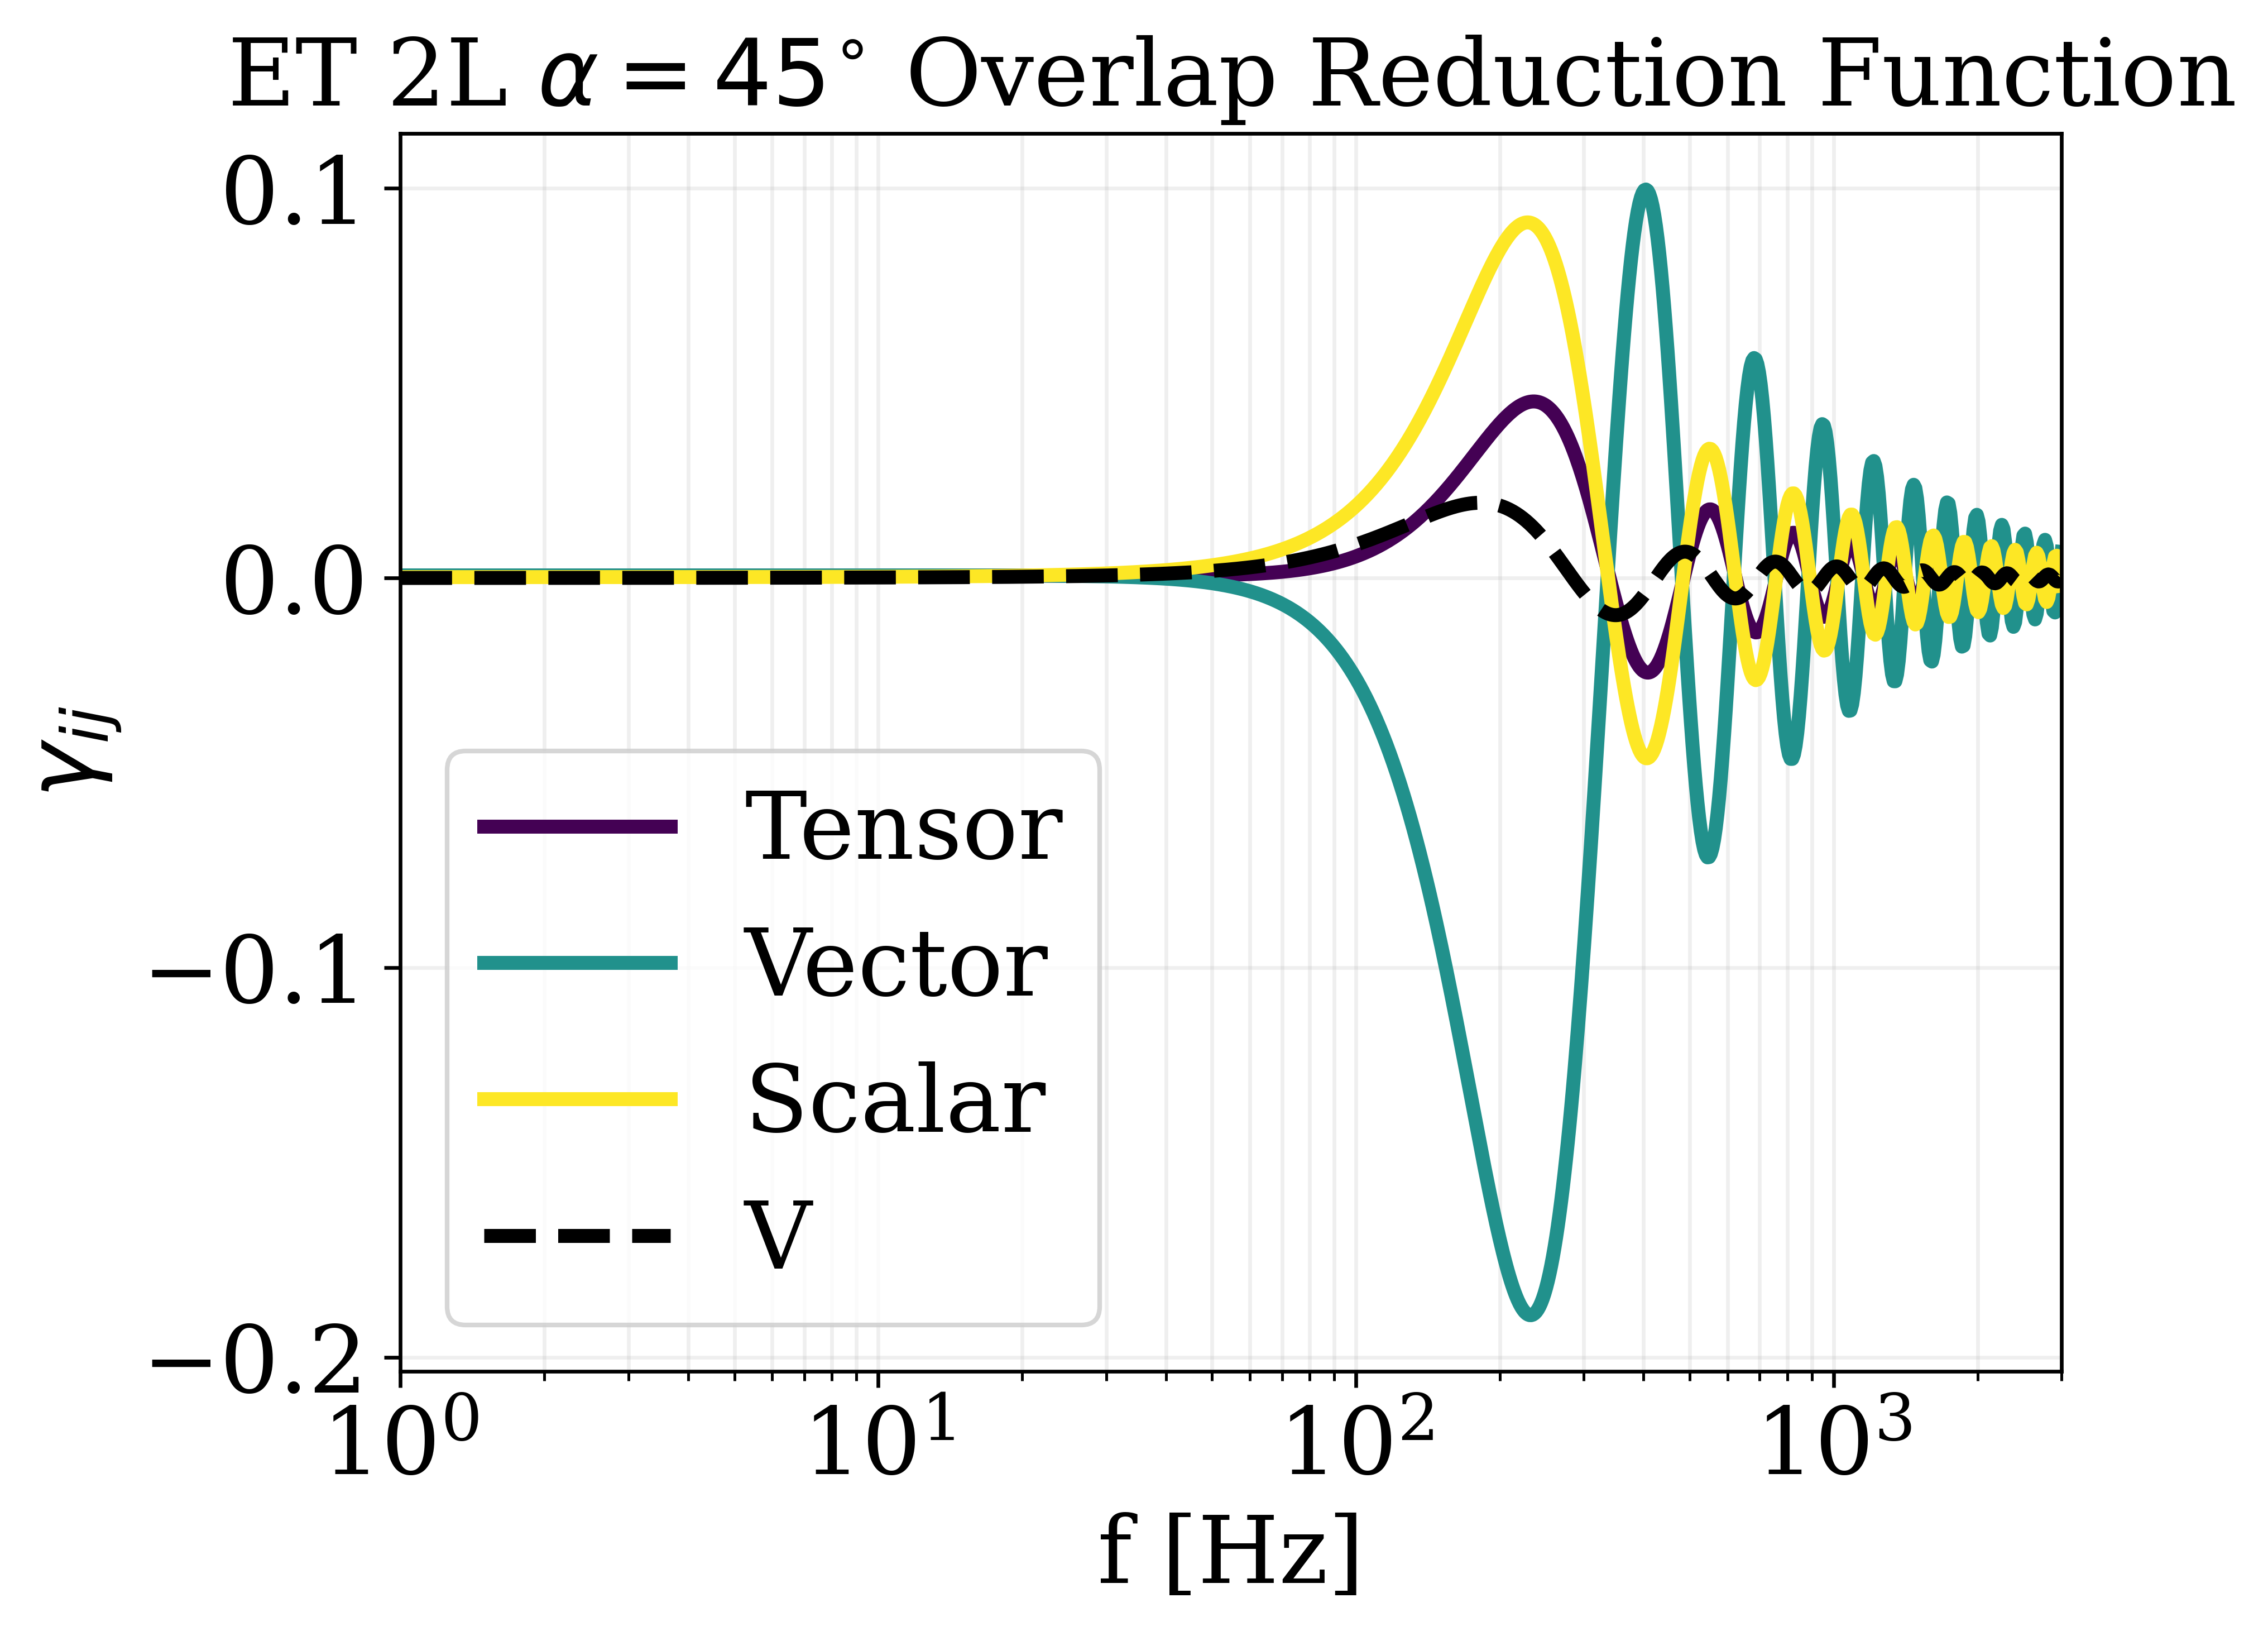

In [2]:
f = np.logspace(0, np.log10(3000), 1000)

print('Calculating Overlaps ET 2L alpha=45')
print('- tensor modes')
R_t = Response.overlap('ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(45))
print('- vector modes')
R_v = Response.overlap('ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(45))
print('- scalar modes')
R_s = Response.overlap('ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(45))
print('-V')
R_V = Response.overlap('ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(45))

colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t, label='Tensor', color = colors[0], rasterized=True) 
plt.plot(f, R_v, label='Vector', color = colors[1], rasterized=True)
plt.plot(f, R_s, label='Scalar', color = colors[2], rasterized=True)
plt.plot(f, R_V, label='V', color = 'k', linestyle='--', rasterized=True)
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}$')
plt.grid(alpha=0.2, which='both')
plt.legend(loc='lower left')
plt.xlim(1, 3000)
plt.title(r'ET 2L $\alpha=45^{\circ}$ Overlap Reduction Function')
plt.show()

In [3]:
print(R_t[0]/R_s[0])

2.9440389557629234


* Power Law Integrated Sensitivity Curve

Min pls_t: 1.7065346301695717e-10 f min: 16.264826917499732
Min pls_v: 7.341548687015192e-11 f min: 97.92740855563171
Min pls_s: 1.1981745771336788e-10 f min: 93.32986783509405
Min pls_V: 2.9469107074114556e-10 f min: 73.97469734291742


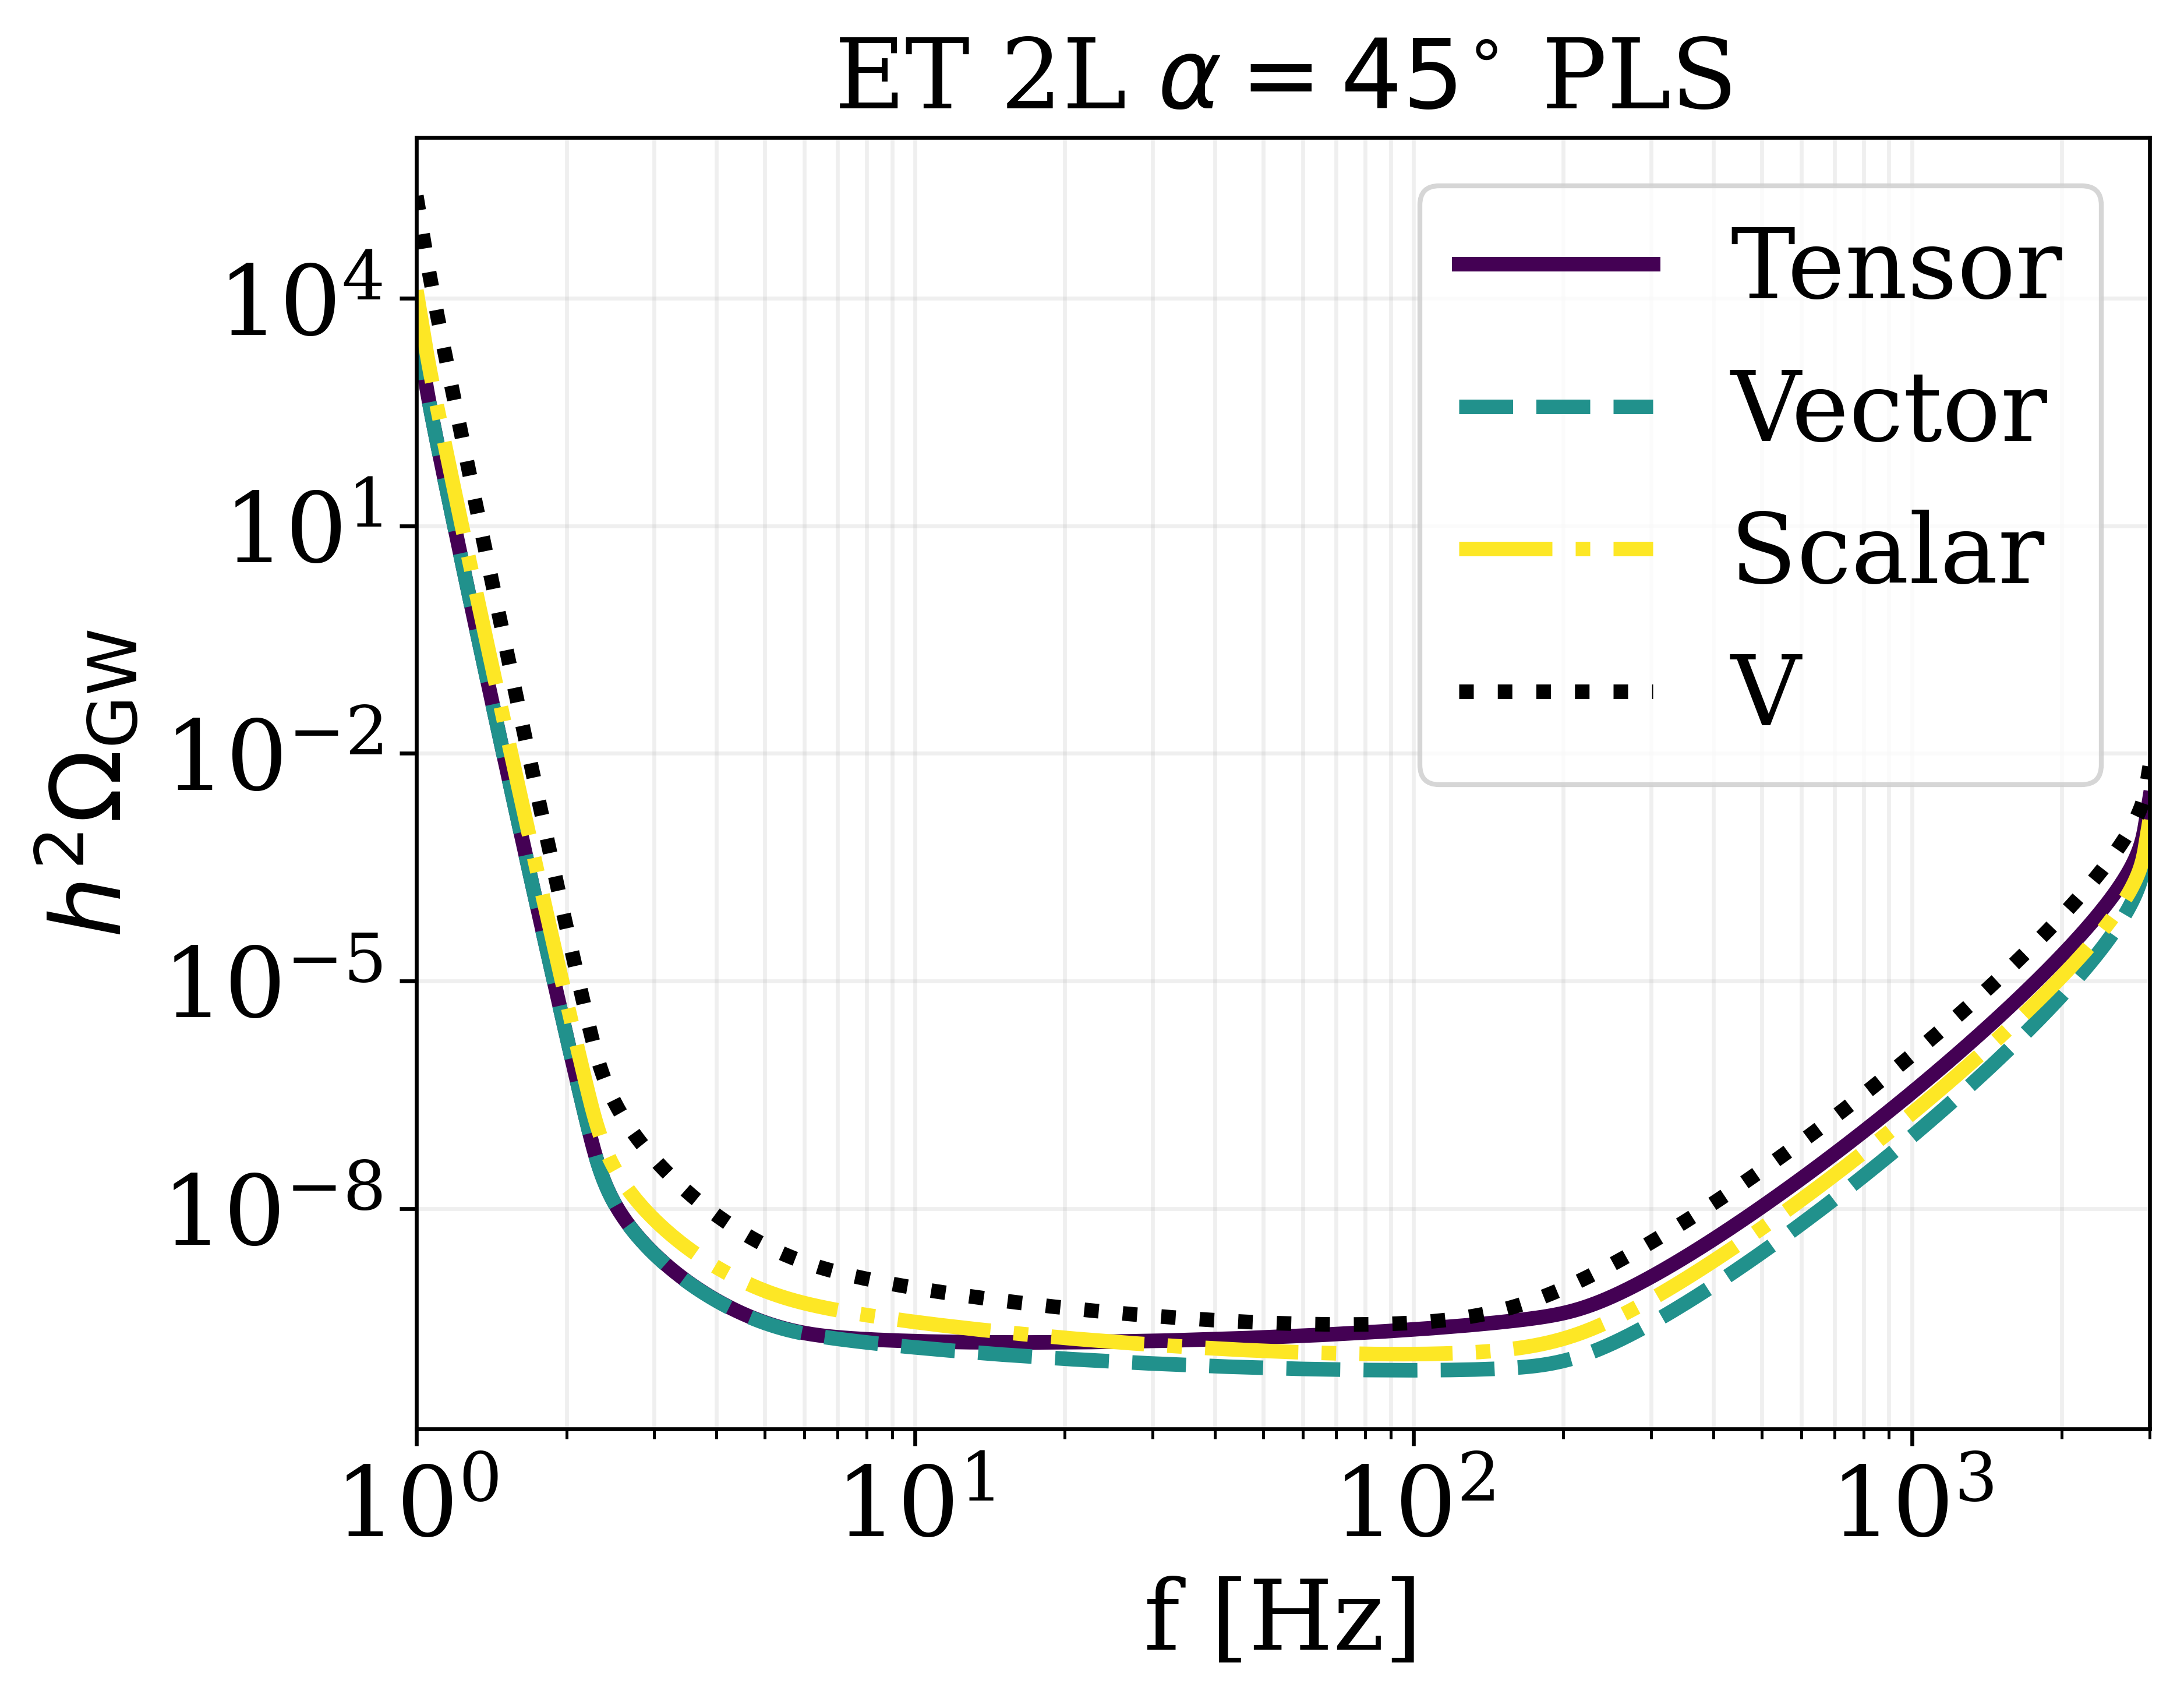

In [4]:
f = np.logspace(0, np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1


pls_t = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, 0, shift_angle=np.deg2rad(45))
pls_v = pls.PLS('ET L1', 'ET L2', f, fref, 'v', snr, Tobs, 0, shift_angle=np.deg2rad(45))
pls_s = pls.PLS('ET L1', 'ET L2', f, fref, 's', snr, Tobs, 0, shift_angle=np.deg2rad(45))
pls_V = pls.PLS('ET L1', 'ET L2', f, fref, 'V', snr, Tobs, 0, shift_angle=np.deg2rad(45))

idx_min_t = np.argmin(pls_t)
idx_min_v = np.argmin(pls_v)
idx_min_s = np.argmin(pls_s)
idx_min_V = np.argmin(pls_V)


print("Min pls_t:", pls_t[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s[idx_min_s], "f min:", f[idx_min_s])
print("Min pls_V:", pls_V[idx_min_V], "f min:", f[idx_min_V])

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_t, label='Tensor', color=colors[0], rasterized=True)
plt.plot(f, pls_v, label='Vector', color=colors[1], linestyle='--', rasterized=True)
plt.plot(f, pls_s, label='Scalar', color=colors[2], linestyle='-.', rasterized=True)
plt.plot(f, pls_V, label='V', color='k', linestyle=':', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title(r'ET 2L $\alpha=45^{\circ}$ PLS')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 3000)
plt.legend()
plt.show()

* Angular Response

In [5]:
f = np.logspace(0, np.log10(3000), 1000)

print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(45))
print('- vector modes')
R0_v = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(45))
print('- scalar modes')
R0_s = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(45))
print('-V')
R0_V = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(45))

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(45))
print('- vector modes')
R1_v = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(45))
print('- scalar modes')
R1_s = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(45))
print('-V')
R1_V = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(45))

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(45))
print('- vector modes')
R2_v = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(45))
print('- scalar modes')
R2_s = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(45))
print('-V')
R2_V = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(45))


print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(45))
print('- vector modes')
R3_v = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(45))
print('- scalar modes')
R3_s = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(45))
print('-V')
R3_V = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(45))


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
-V
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
-V
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
-V
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes
-V


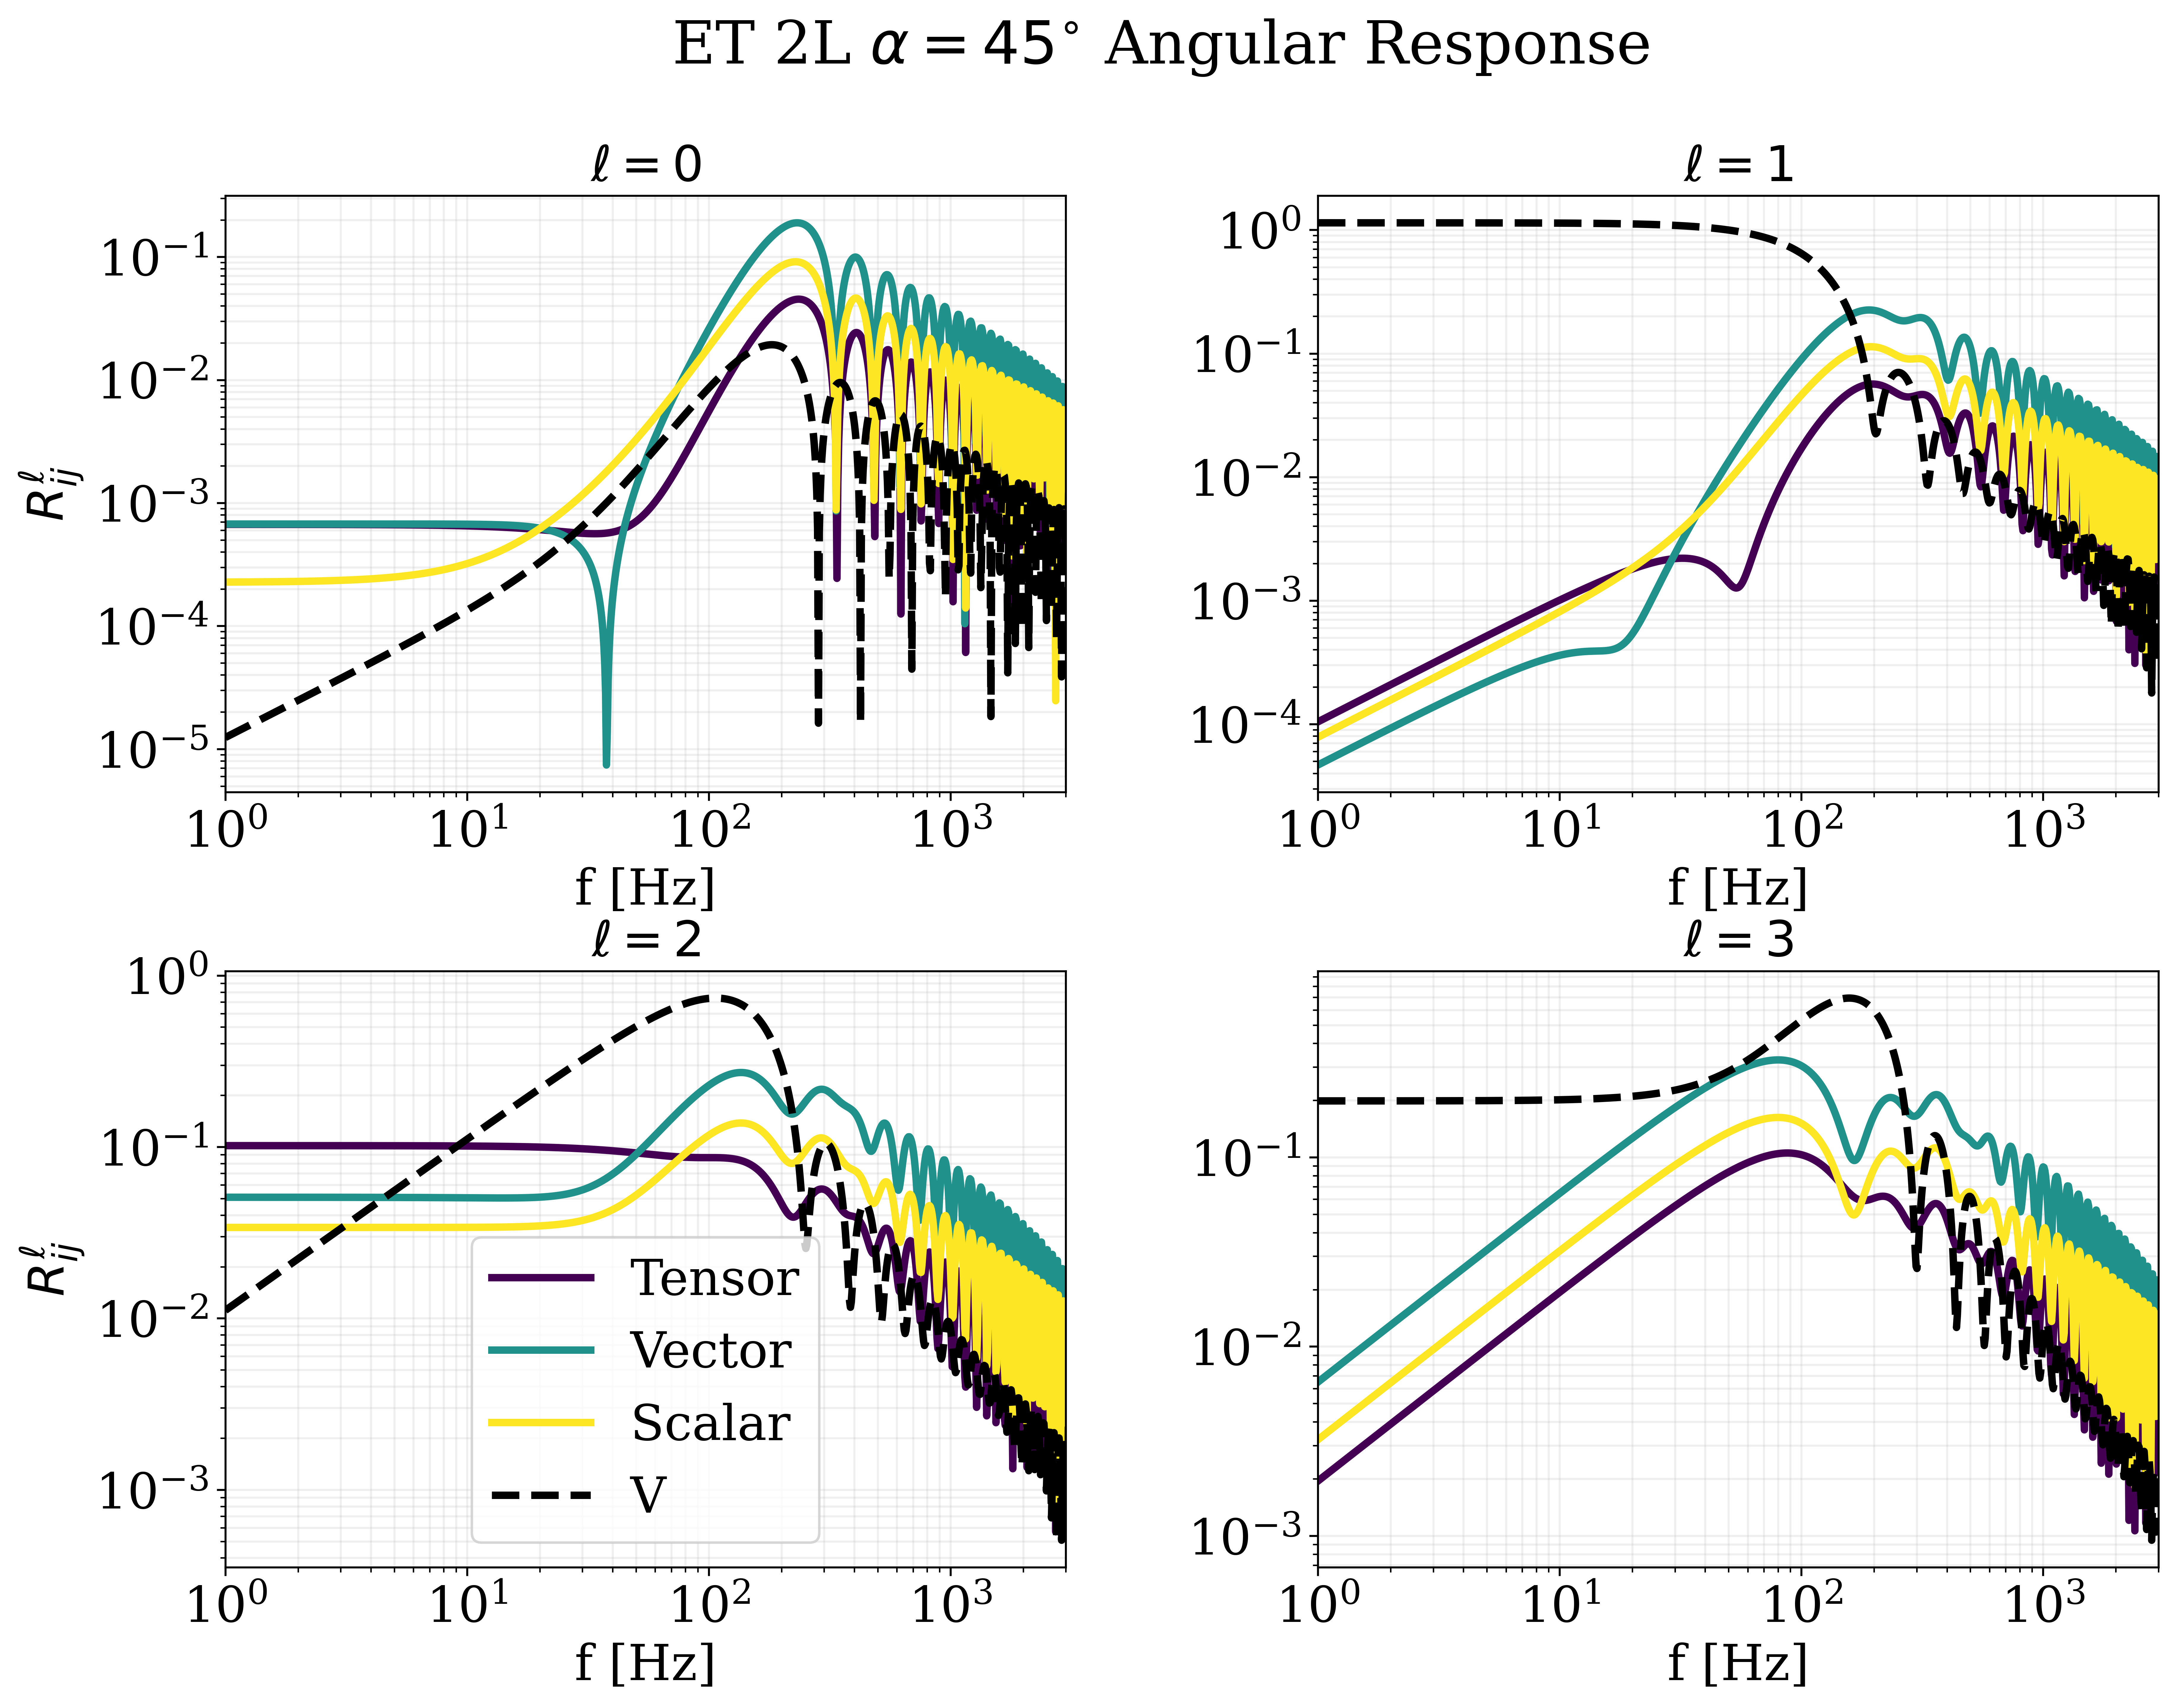

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})


# monopole
axs[0, 0].plot(f, R0_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 0].plot(f, R0_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 0].plot(f, R0_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 0].plot(f, R0_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}^{\ell}$')
#axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_xlim(1, 3000)
axs[0, 0].set_title(r'$\ell = 0$')


# dipole
axs[0, 1].plot(f, R1_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 1].plot(f, R1_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 1].plot(f, R1_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 1].plot(f, R1_V, label='V', color='k', linestyle='--', rasterized=True)

axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
#axs[0, 1].legend()
axs[0, 1].set_xlim(1, 3000)
axs[0, 1].grid(alpha=0.2, which='both')

axs[0, 1].set_title(r'$\ell = 1$')

# quadrupole
axs[1, 0].plot(f, R2_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 0].plot(f, R2_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 0].plot(f, R2_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 0].plot(f, R2_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}^{\ell}$')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_xlim(1, 3000)
axs[1, 0].set_title(r'$\ell = 2$')

# octupole
axs[1, 1].plot(f, R3_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 1].plot(f, R3_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 1].plot(f, R3_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 1].plot(f, R3_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
#axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_xlim(1, 3000)
axs[1, 1].set_title(r'$\ell = 3$')

fig.suptitle(r'ET 2L $\alpha=45^{\circ}$ Angular Response')

plt.show()

* Sensitivity curver for the multipoles


Min pls_0_t: 1.7065346301695711e-10 f min: 16.264826917499732
Min pls_1_t: 3.2897803665642147e-09 f min: 31.632928534588178
Min pls_2_t: 4.0019456151642696e-11 f min: 8.099106029389995
Min pls_3_t: 1.8813796965854609e-10 f min: 17.763807838551717


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ angular PLS (Tensor)')

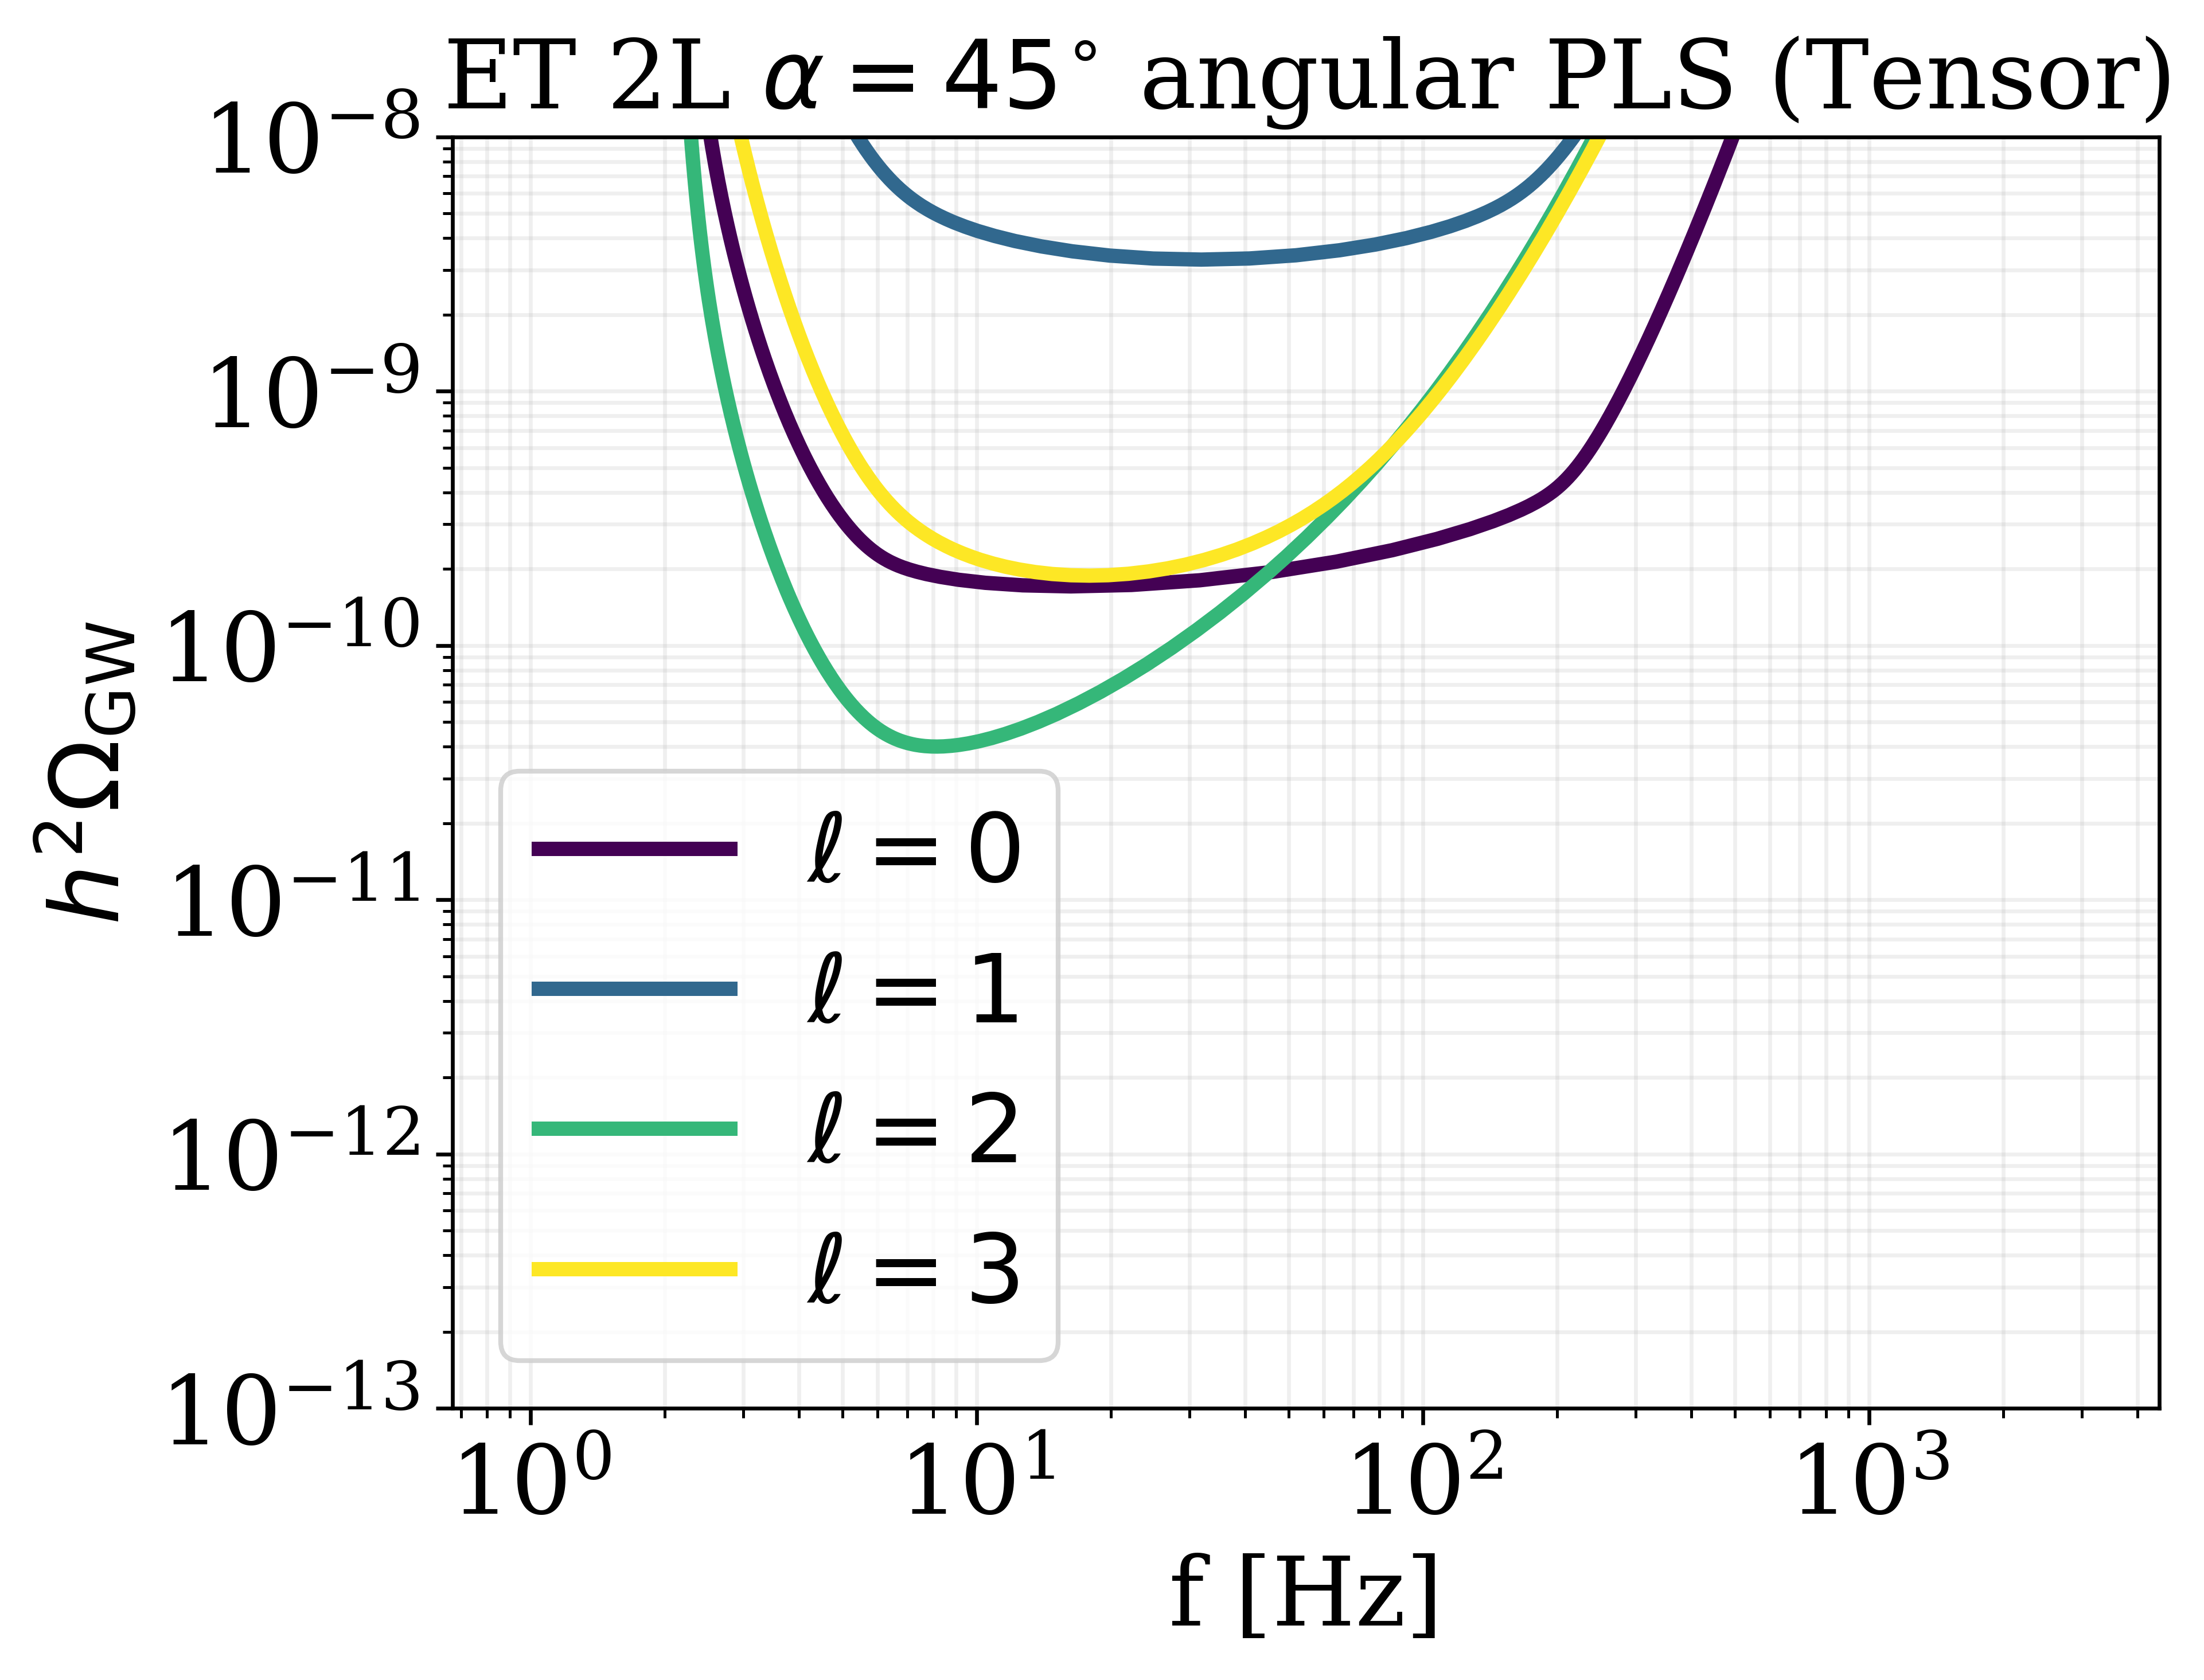

In [67]:
#tensors

colors = plt.cm.viridis(np.linspace(0, 1, 4))

snr = 1
Tobs = 1
fref = 25

pls0_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 't', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(45))
pls1_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 't', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls2_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 't', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls3_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 't', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(45))

idx_min_0_t = np.argmin(pls0_t)
idx_min_1_t = np.argmin(pls1_t)
idx_min_2_t = np.argmin(pls2_t)
idx_min_3_t = np.argmin(pls3_t)


print("Min pls_0_t:", pls0_t[idx_min_0_t], "f min:", f[idx_min_0_t])
print("Min pls_1_t:", pls1_t[idx_min_1_t], "f min:", f[idx_min_1_t])
print("Min pls_2_t:", pls2_t[idx_min_2_t], "f min:", f[idx_min_2_t])
print("Min pls_3_t:", pls3_t[idx_min_3_t], "f min:", f[idx_min_3_t])


colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_t, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_t, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_t, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_t, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=45^{\circ}$ angular PLS (Tensor)')
plt.show()

Min pls_0_v: 7.34154868701519e-11 f min: 97.92740855563171
Min pls_1_v: 9.916311359426697e-10 f min: 103.57822753582681
Min pls_2_v: 7.764475505935506e-11 f min: 9.207181708690936
Min pls_3_v: 5.6942026947994315e-11 f min: 17.48134576323179


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ angular PLS (Vector)')

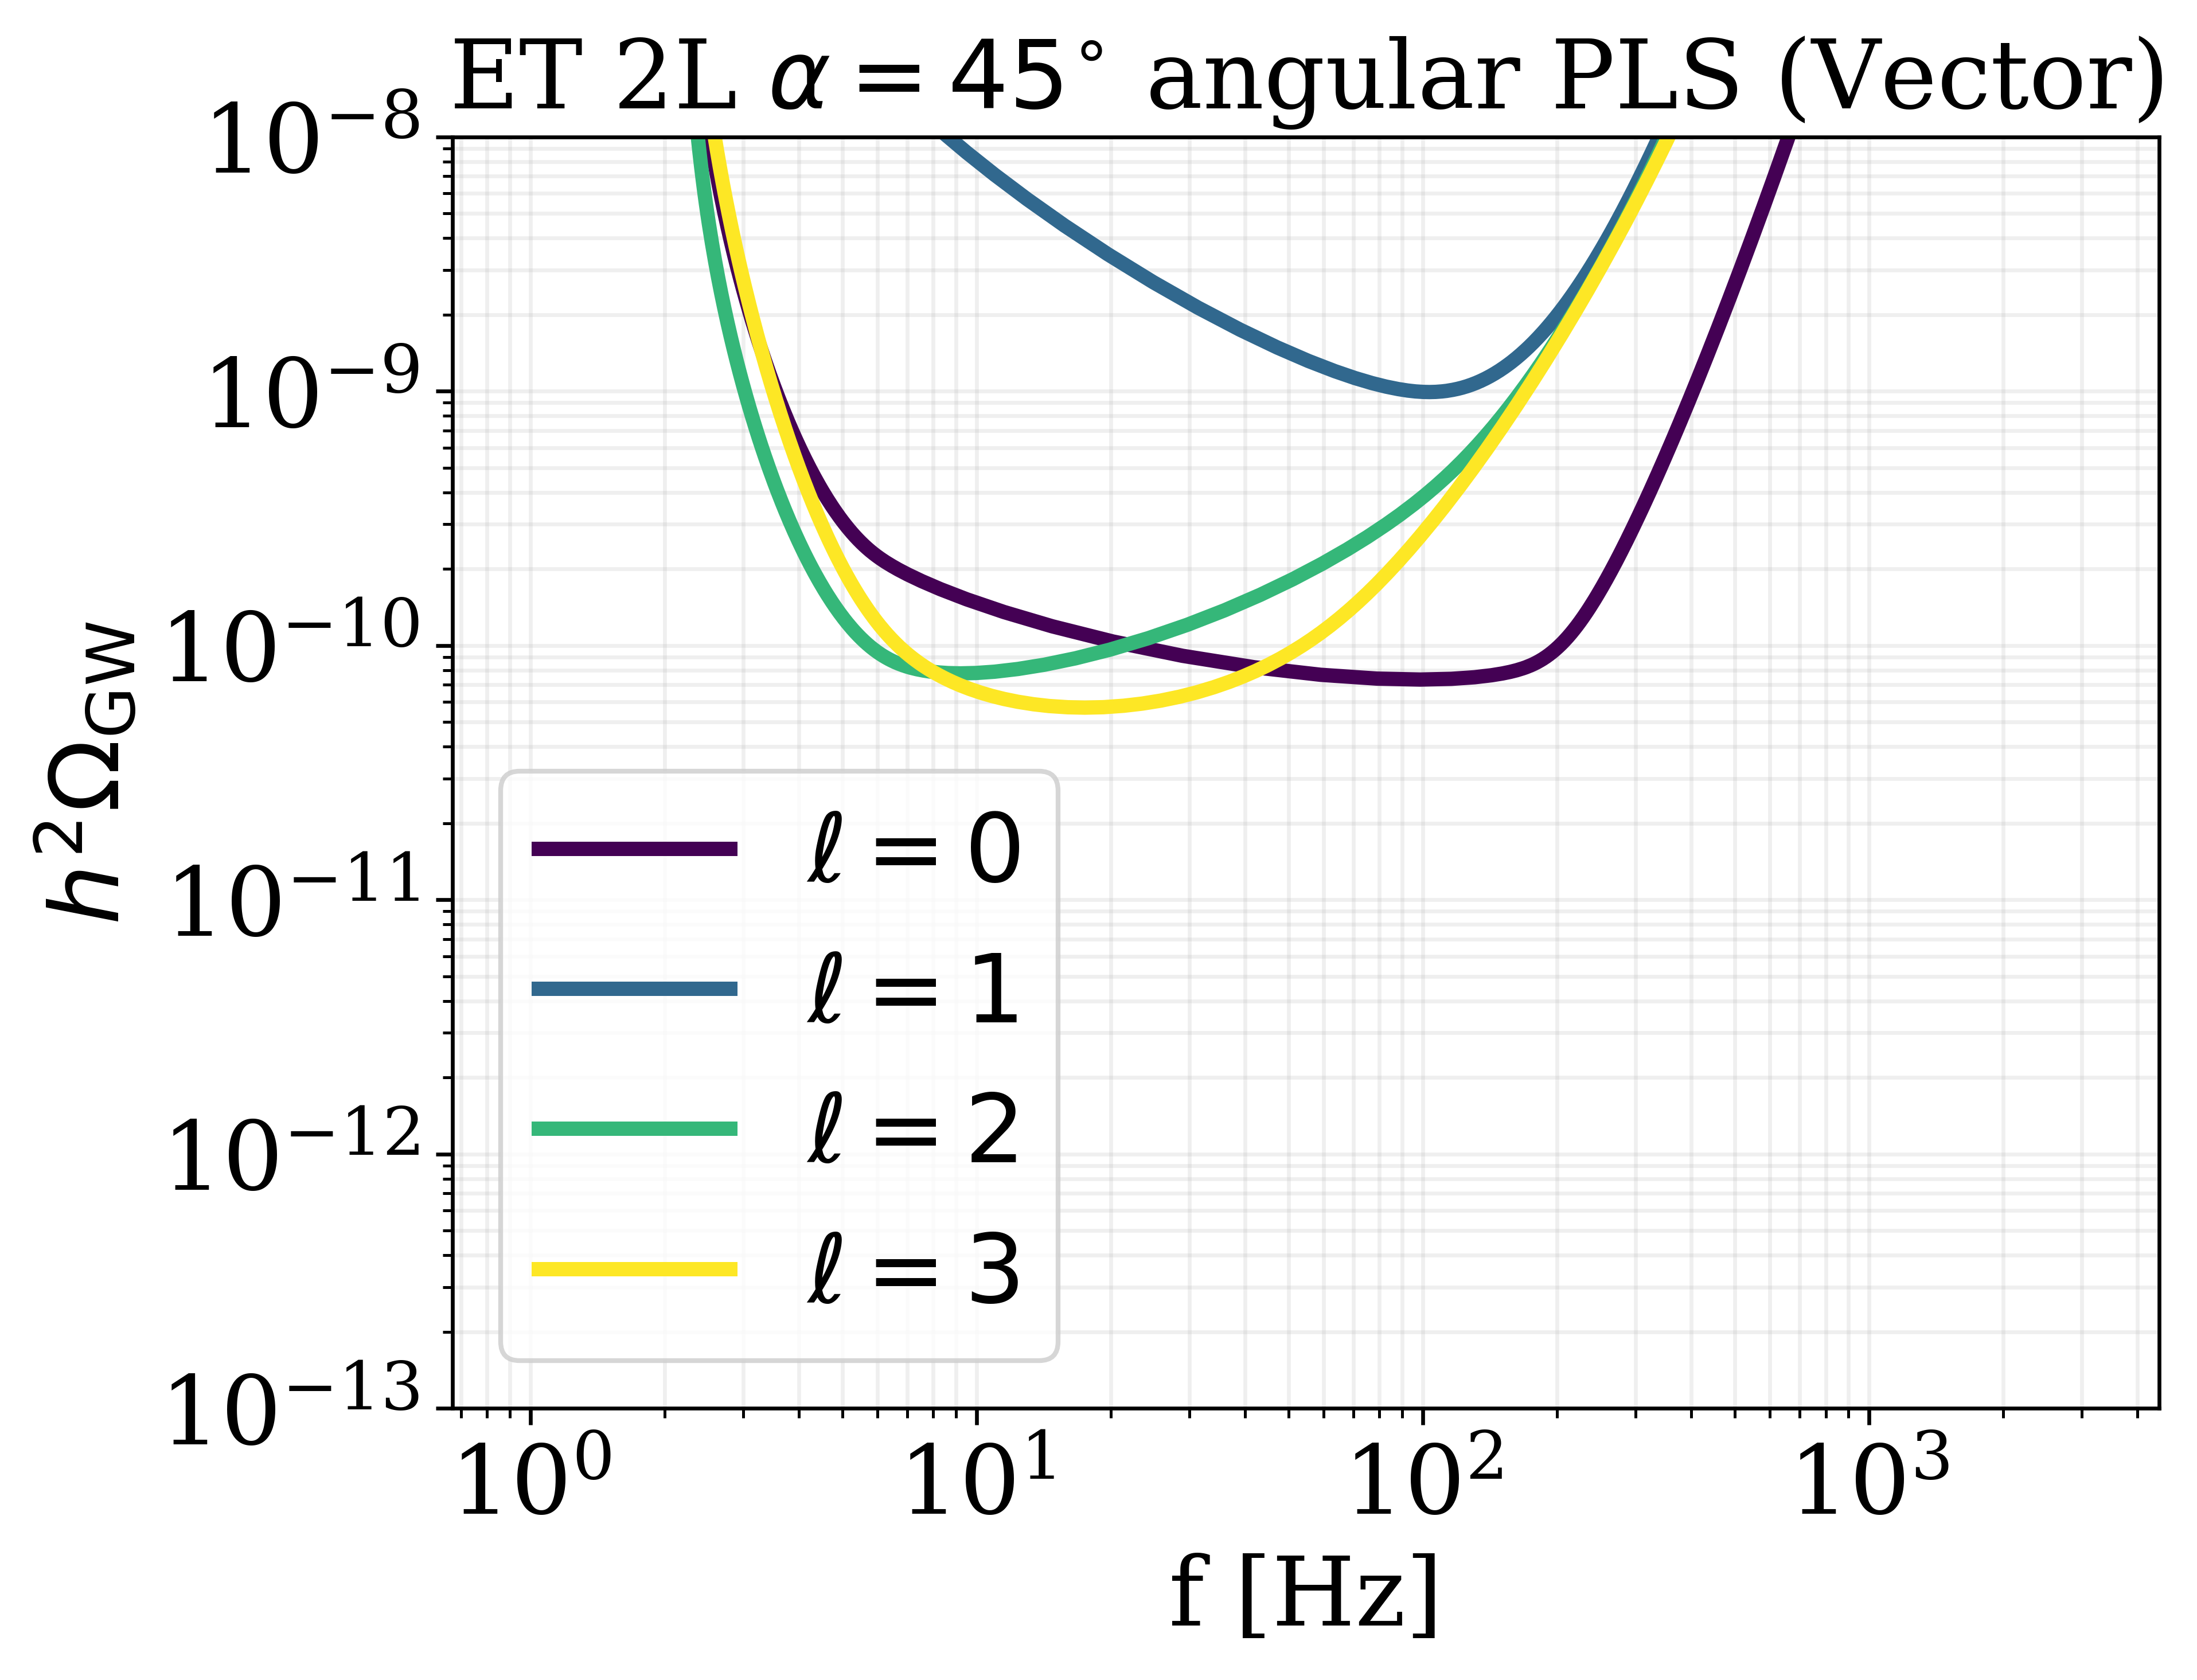

In [68]:
#vectors

snr = 1
Tobs = 1
fref = 25

pls0_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 'v', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(45))
pls1_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 'v', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls2_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 'v', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls3_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 'v', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(45))

idx_min_0_v = np.argmin(pls0_v)
idx_min_1_v = np.argmin(pls1_v)
idx_min_2_v = np.argmin(pls2_v)
idx_min_3_v = np.argmin(pls3_v)


print("Min pls_0_v:", pls0_v[idx_min_0_v], "f min:", f[idx_min_0_v])
print("Min pls_1_v:", pls1_v[idx_min_1_v], "f min:", f[idx_min_1_v])
print("Min pls_2_v:", pls2_v[idx_min_2_v], "f min:", f[idx_min_2_v])
print("Min pls_3_v:", pls3_v[idx_min_3_v], "f min:", f[idx_min_3_v])


colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_v, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_v, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_v, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_v, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=45^{\circ}$ angular PLS (Vector)')
plt.show()


Min pls_0_s: 1.1981745771336788e-10 f min: 93.32986783509405
Min pls_1_s: 1.7091864839618827e-09 f min: 74.56994089054804
Min pls_2_s: 1.1699436488886832e-10 f min: 8.845526847589452
Min pls_3_s: 1.1475541510503324e-10 f min: 17.48134576323179


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ angular PLS (Scalar)')

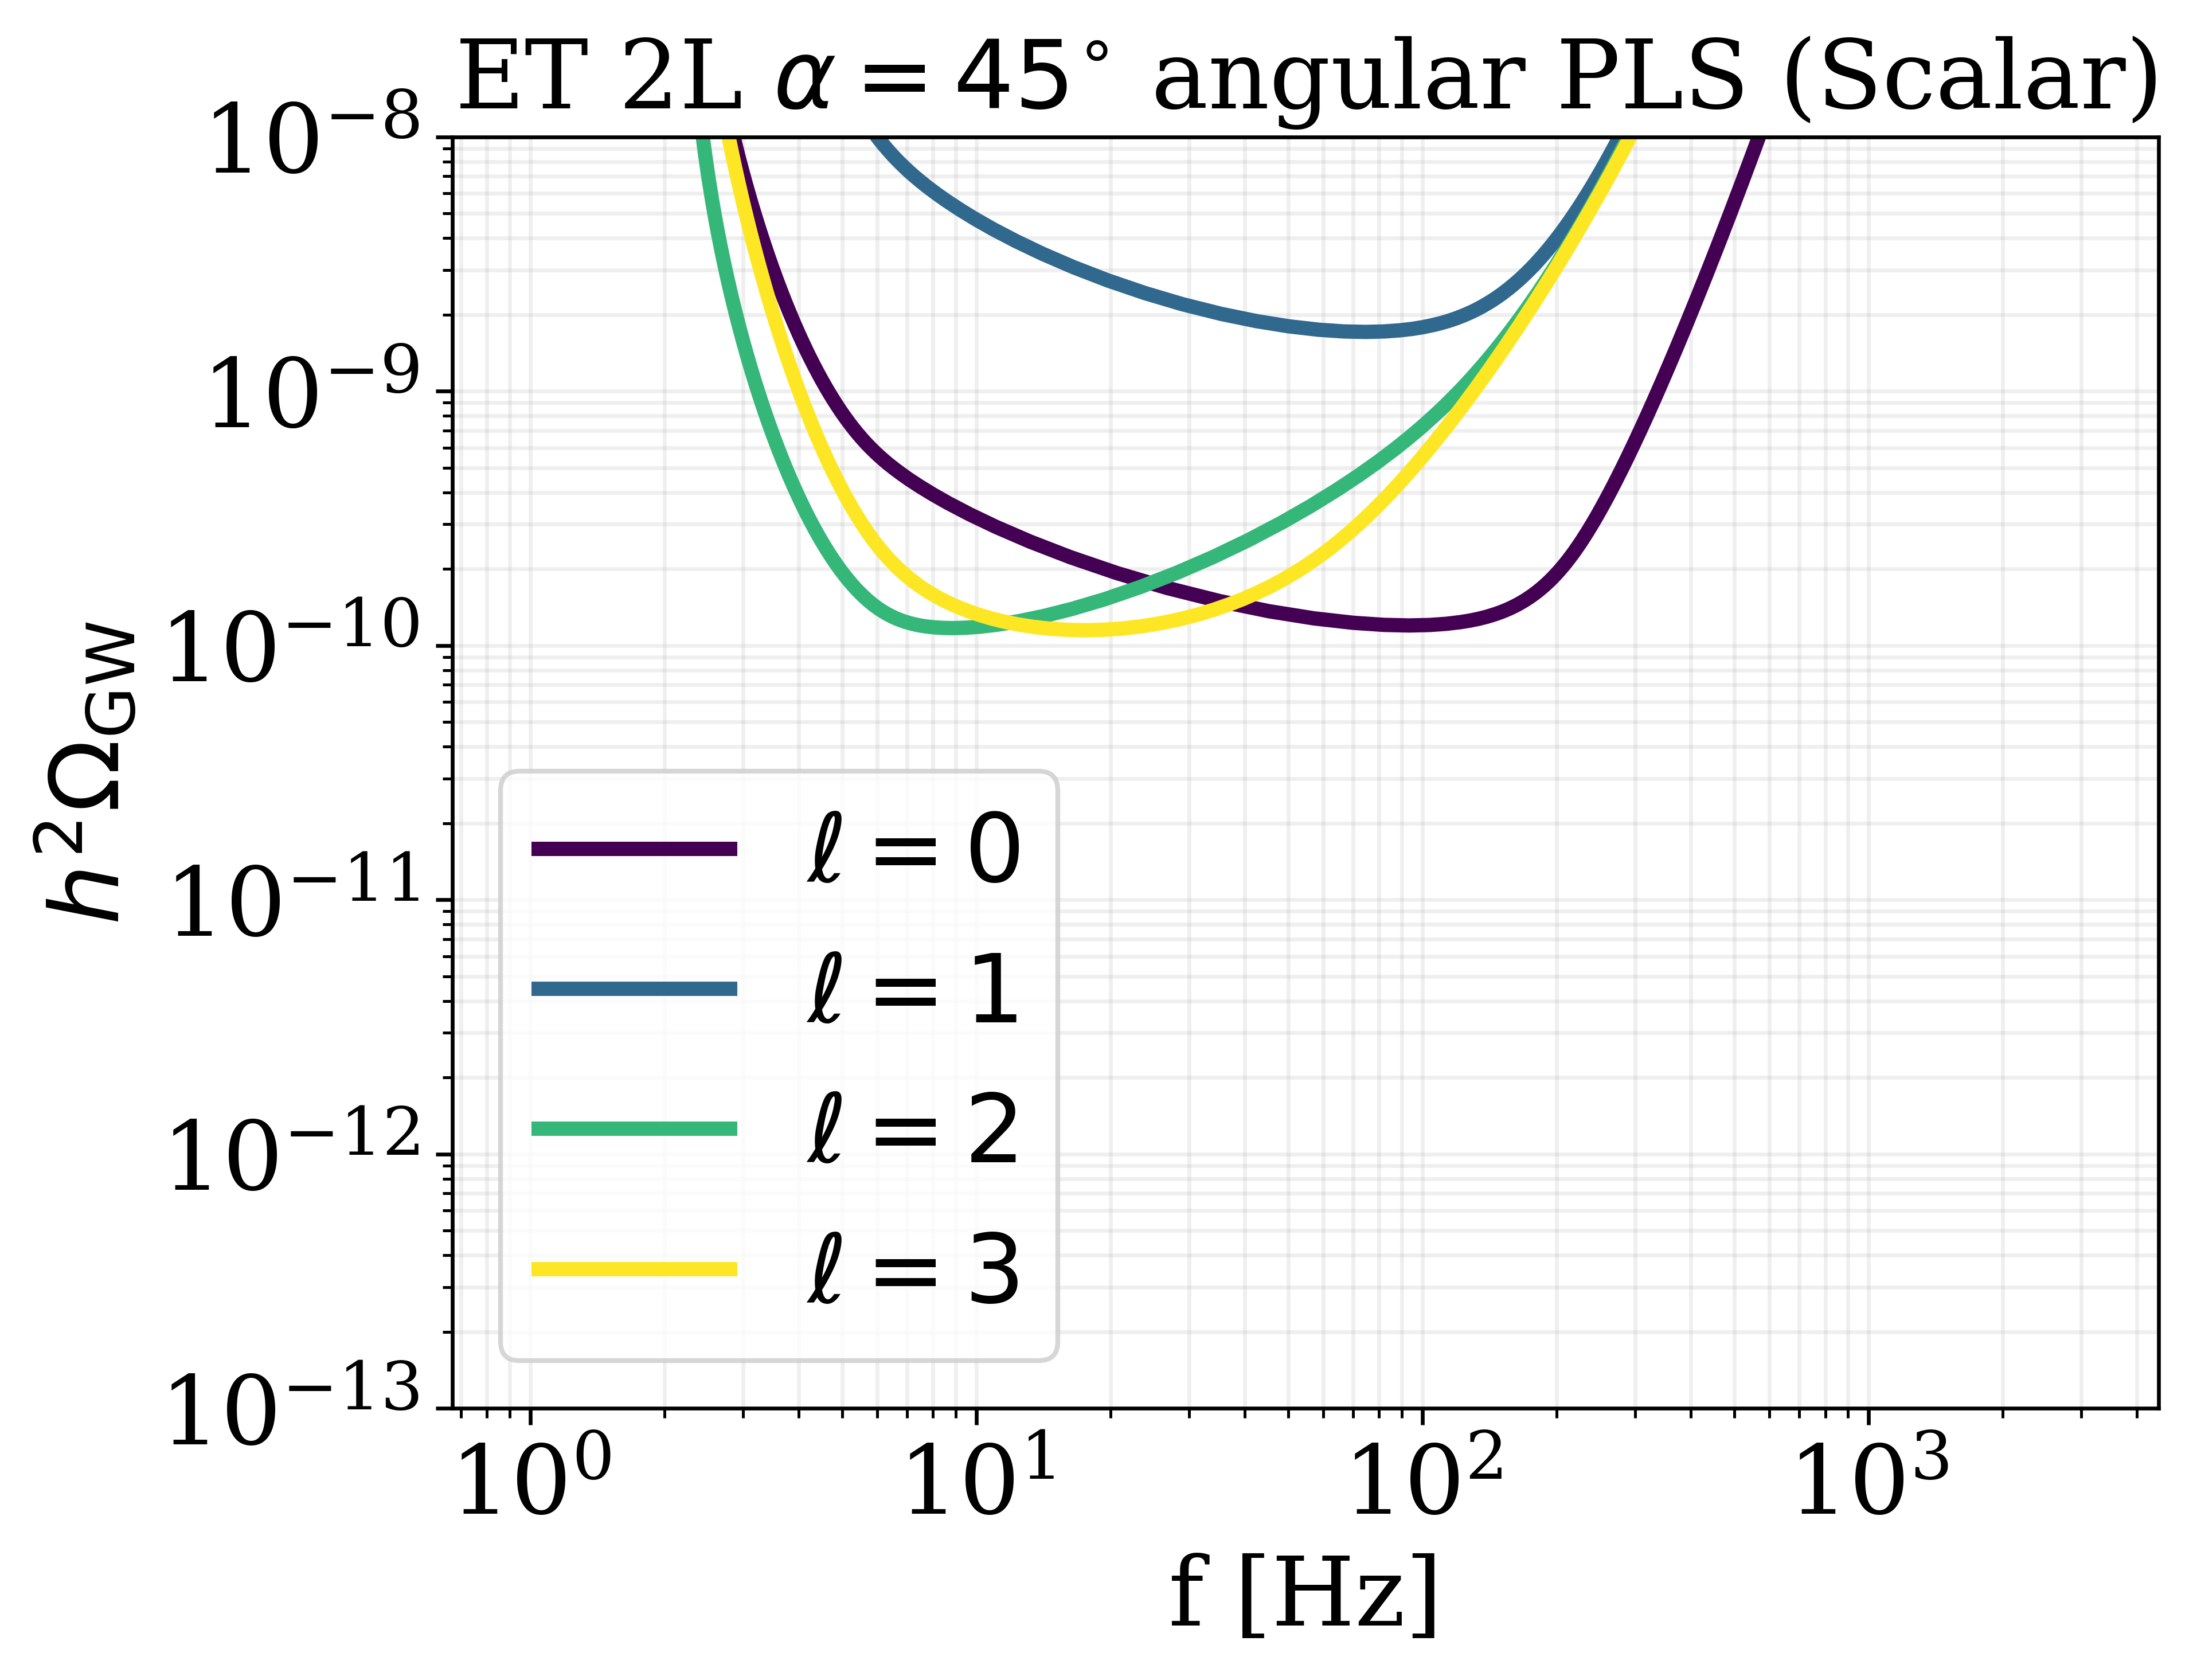

In [69]:
#scalars

snr = 1
Tobs = 1
fref = 25

pls0_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 's', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(45))
pls1_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 's', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls2_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 's', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls3_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 's', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(45))


idx_min_0_s = np.argmin(pls0_s)
idx_min_1_s = np.argmin(pls1_s)
idx_min_2_s = np.argmin(pls2_s)
idx_min_3_s = np.argmin(pls3_s)


print("Min pls_0_s:", pls0_s[idx_min_0_s], "f min:", f[idx_min_0_s])
print("Min pls_1_s:", pls1_s[idx_min_1_s], "f min:", f[idx_min_1_s])
print("Min pls_2_s:", pls2_s[idx_min_2_s], "f min:", f[idx_min_2_s])
print("Min pls_3_s:", pls3_s[idx_min_3_s], "f min:", f[idx_min_3_s])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_s, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_s, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_s, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_s, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=45^{\circ}$ angular PLS (Scalar)')
plt.show()


Min pls_0_V: 2.9469107074114556e-10 f min: 73.97469734291742
Min pls_1_V: 3.5677988158006695e-12 f min: 8.099106029389995
Min pls_2_V: 3.218732113562775e-11 f min: 18.78885347158918
Min pls_3_V: 1.9862016202800382e-11 f min: 8.704874241268985


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ angular PLS (V)')

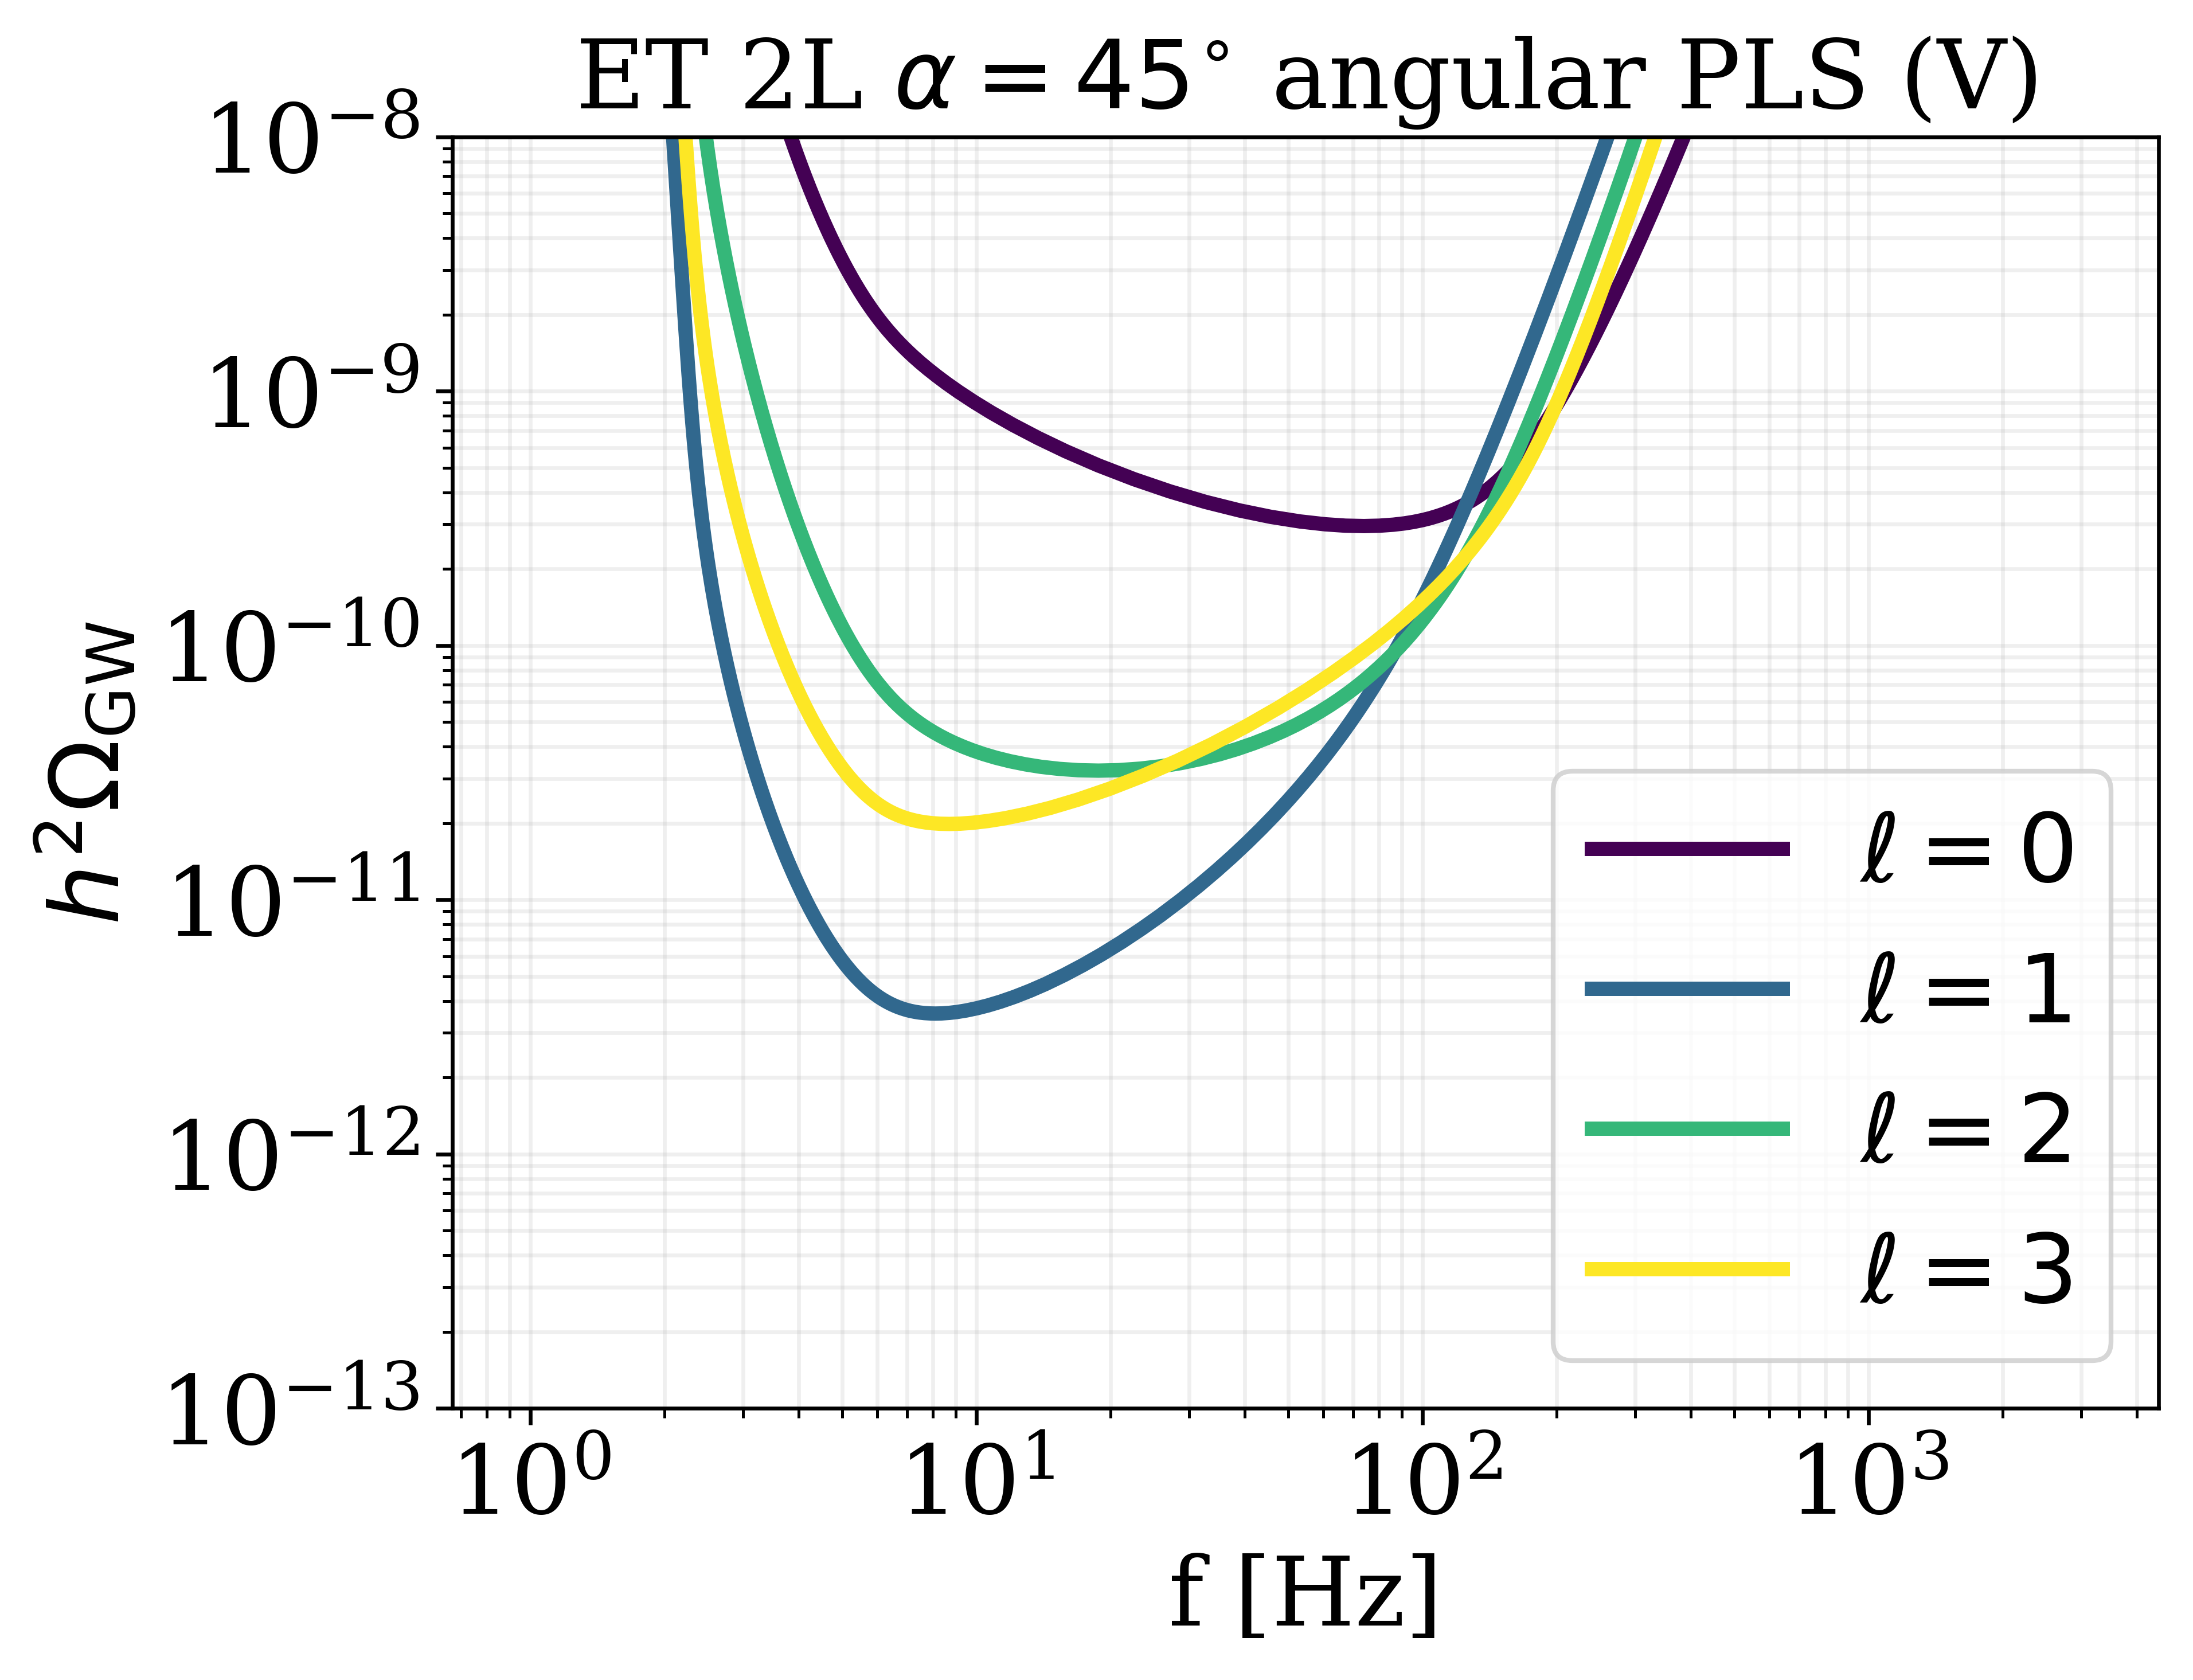

In [70]:
# V

snr = 1
Tobs = 1
fref = 25

pls0_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 'V', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(45))
pls1_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 'V', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls2_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 'V', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(45))
pls3_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 'V', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(45))


idx_min_0_V = np.argmin(pls0_V)
idx_min_1_V = np.argmin(pls1_V)
idx_min_2_V = np.argmin(pls2_V)
idx_min_3_V = np.argmin(pls3_V)


print("Min pls_0_V:", pls0_V[idx_min_0_V], "f min:", f[idx_min_0_V])
print("Min pls_1_V:", pls1_V[idx_min_1_V], "f min:", f[idx_min_1_V])
print("Min pls_2_V:", pls2_V[idx_min_2_V], "f min:", f[idx_min_2_V])
print("Min pls_3_V:", pls3_V[idx_min_3_V], "f min:", f[idx_min_3_V])


colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_V, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_V, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_V, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_V, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=45^{\circ}$ angular PLS (V)')
plt.show()

* ET 2L $\alpha=45^{\circ}$ + CE sensitivity to X polarization modes

Min pls_t: 6.803594161651947e-11 f min: 29.79327544124938
Min pls_v: 8.408924450451044e-11 f min: 32.37086374548552


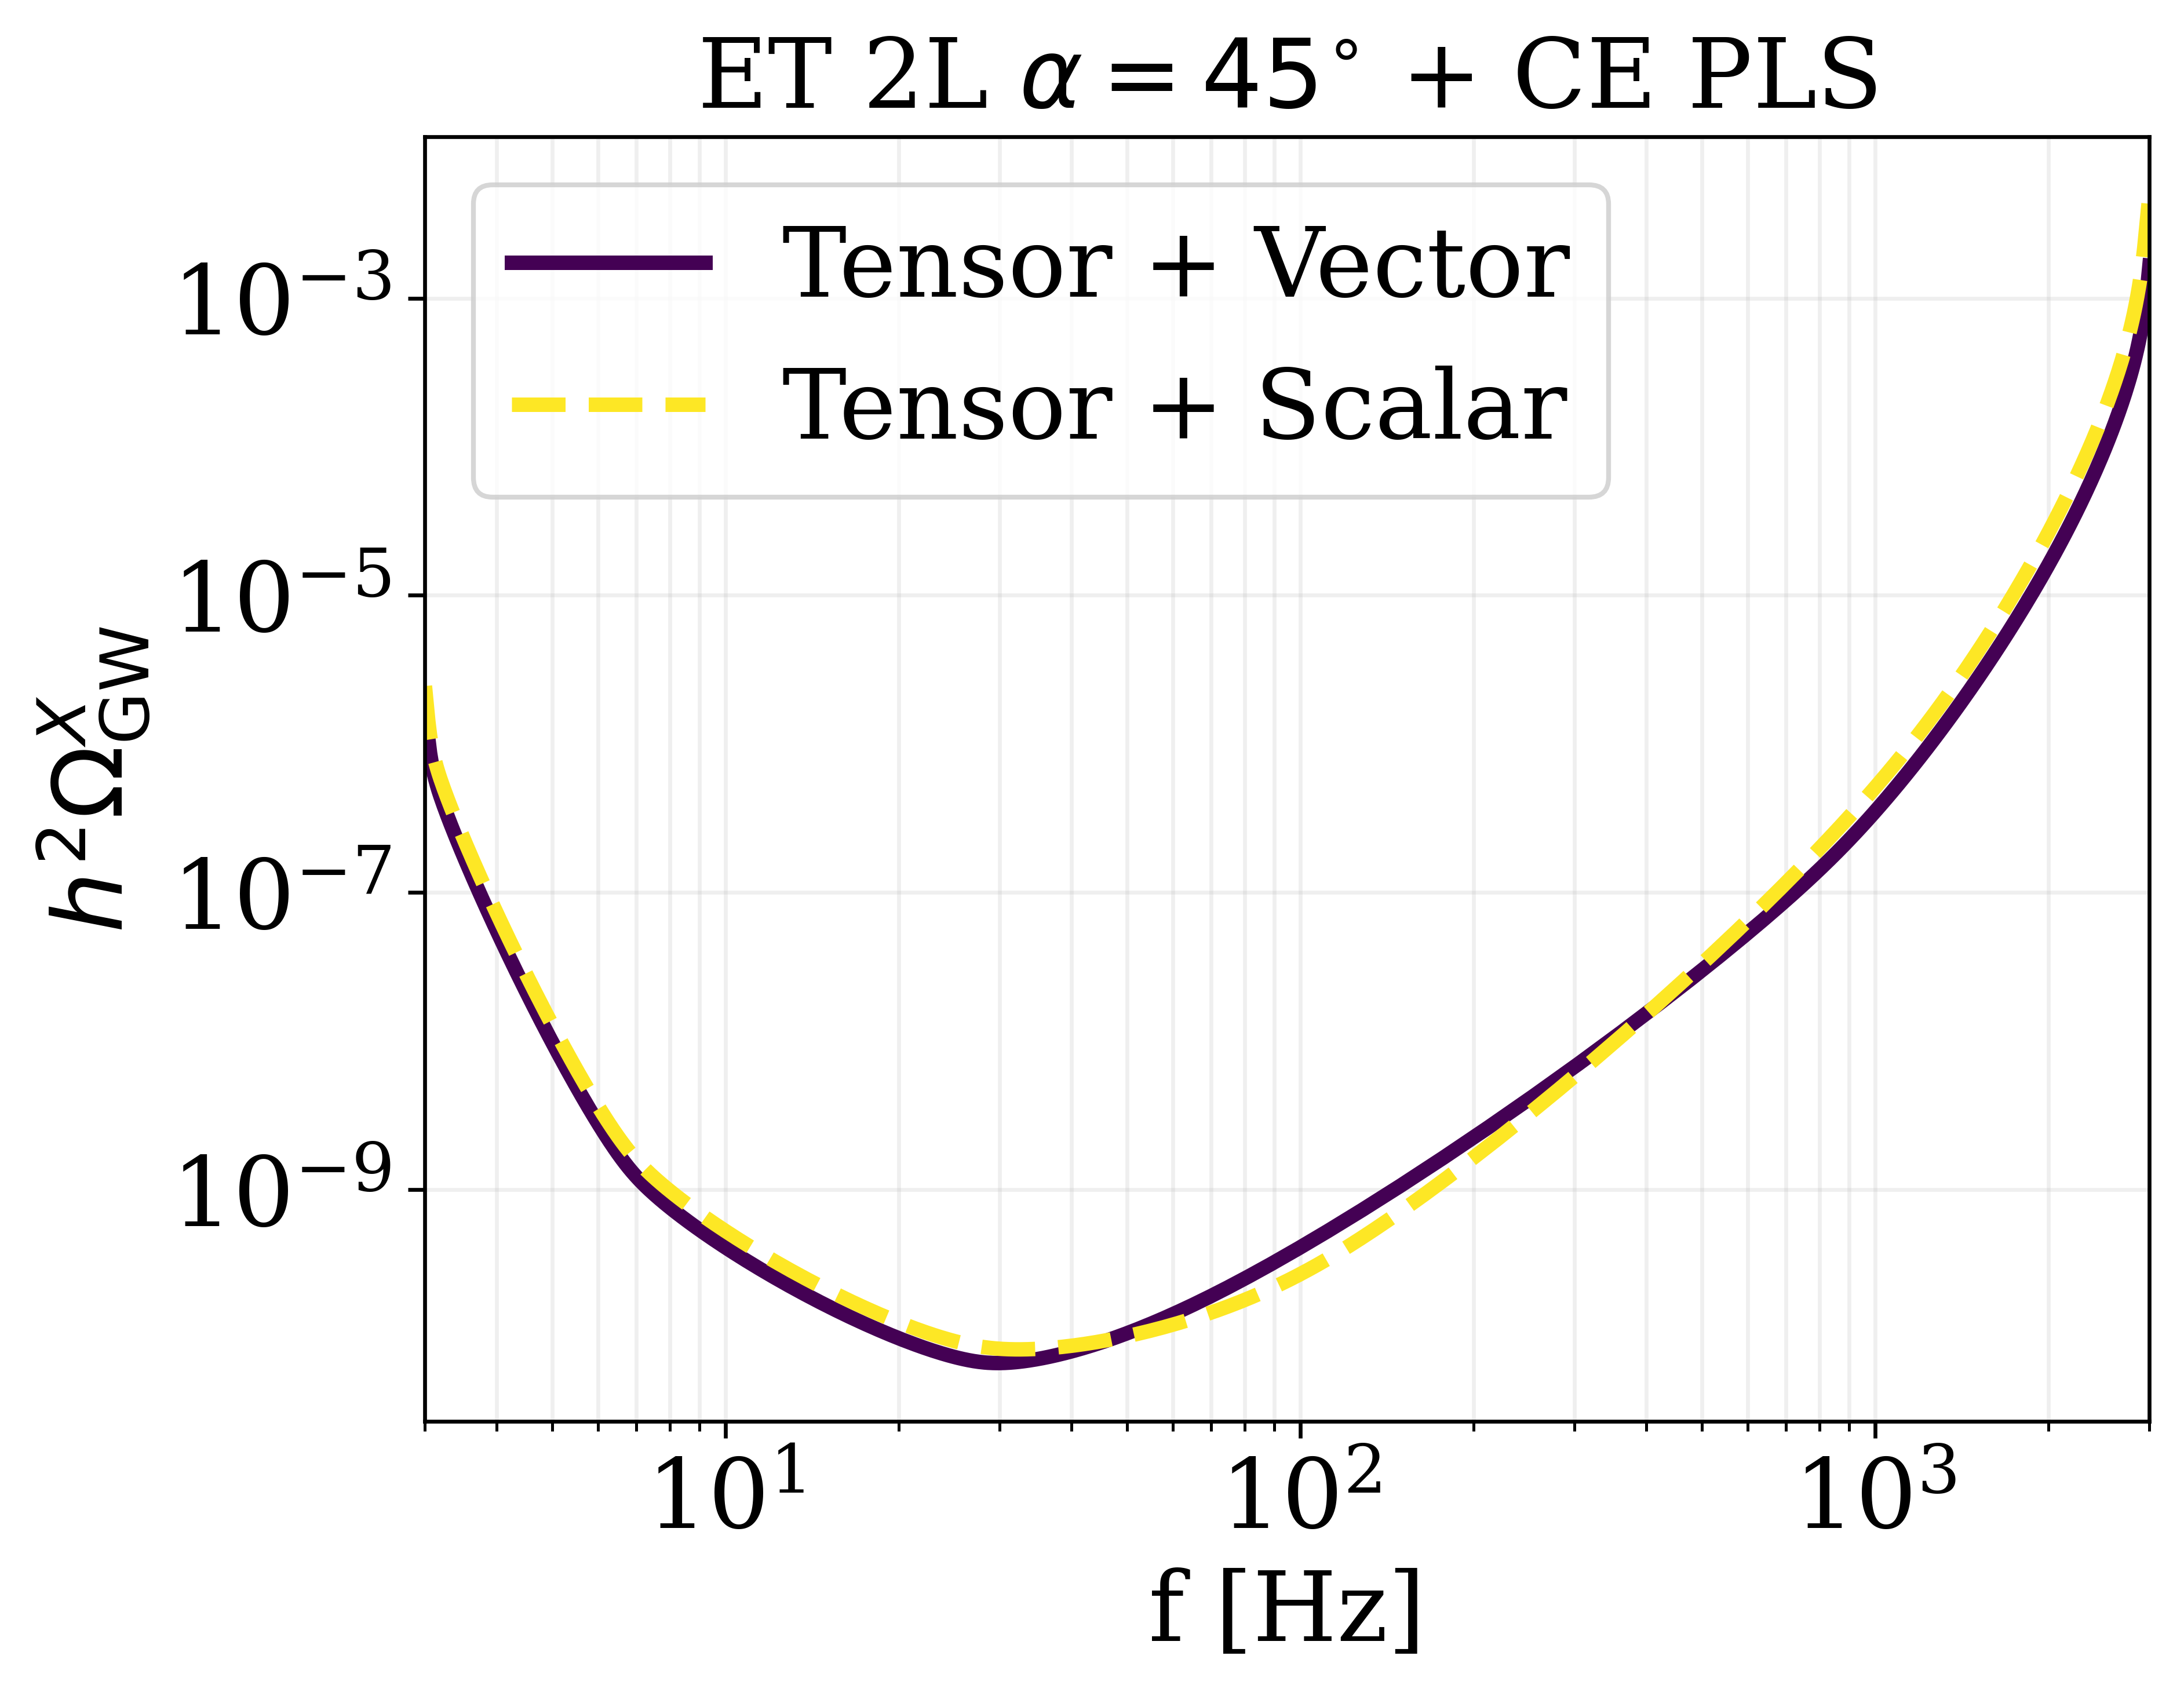

In [71]:

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1


pls_tv_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, 0, np.deg2rad(45))
pls_ts_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, 0, np.deg2rad(45))

idx_min_tv = np.argmin(pls_tv_etCE)
idx_min_ts = np.argmin(pls_ts_etCE)

print("Min pls_t:", pls_tv_etCE[idx_min_tv], "f min:", f[idx_min_tv])
print("Min pls_v:", pls_ts_etCE[idx_min_ts], "f min:", f[idx_min_ts])

colors = plt.cm.viridis(np.linspace(0, 1, 2))
plt.plot(f, pls_tv_etCE, label='Tensor + Vector', color=colors[0], rasterized=True)
plt.plot(f, pls_ts_etCE, label='Tensor + Scalar', linestyle='--', color=colors[1], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}^X$')
plt.xlim(3, 3e3)
plt.title(r'ET 2L $\alpha=45^{\circ}$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.show()

* ET 2L $\alpha=45^{\circ}$ + CE sensitivity to M=t,v, s polarization modes

Min pls_t: 5.887826071098602e-11 f min: 39.833124880662886
Min pls_v: 5.264083847572359e-11 f min: 25.412604799672216
Min pls_s: 1.1026707391394658e-10 f min: 28.189944944864084


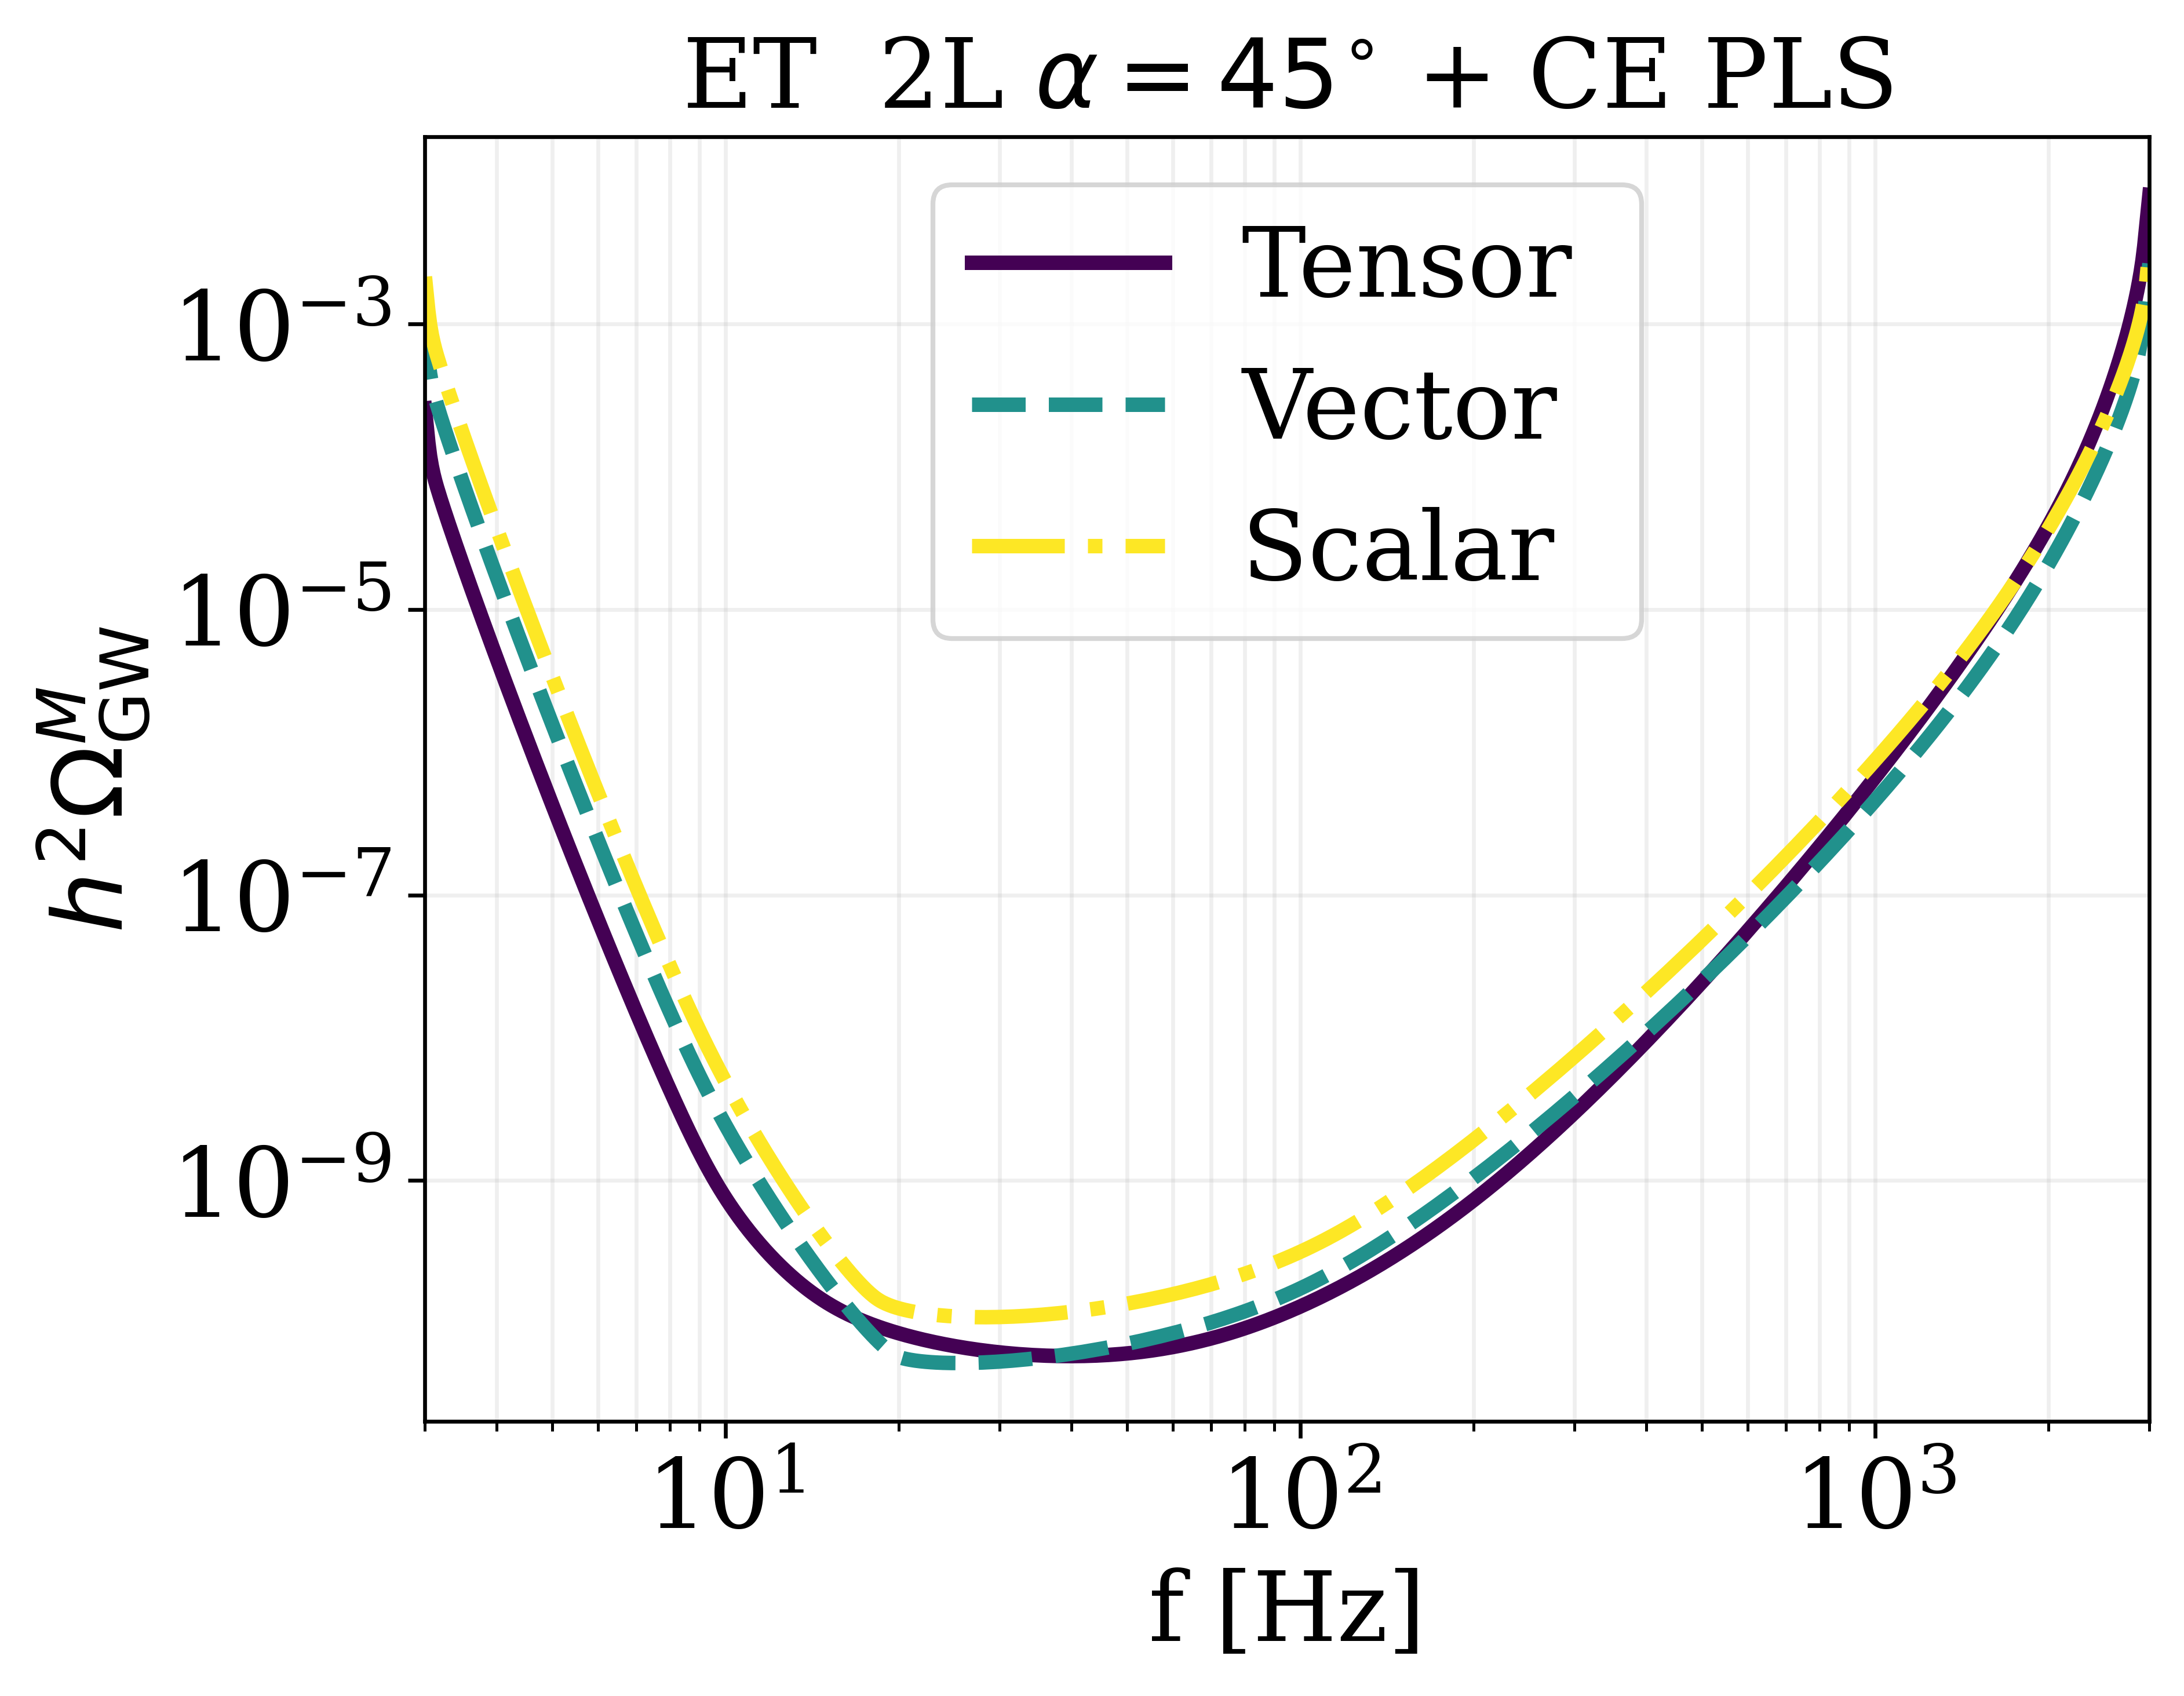

In [72]:
# tensor + vector + scalar modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1


pls_t_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 't', snr, Tobs, 0, np.deg2rad(45))
pls_v_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, 0, np.deg2rad(45))
pls_s_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, 0, np.deg2rad(45))

idx_min_t = np.argmin(pls_t_etCE)
idx_min_v = np.argmin(pls_v_etCE)
idx_min_s = np.argmin(pls_s_etCE)

print("Min pls_t:", pls_t_etCE[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v_etCE[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s_etCE[idx_min_s], "f min:", f[idx_min_s])

colors = plt.cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, pls_t_etCE, label='Tensor ', color=colors[0], rasterized=True)
plt.plot(f, pls_v_etCE, label='Vector', linestyle='--', color=colors[1], rasterized=True)
plt.plot(f, pls_s_etCE, label='Scalar', linestyle='-.', color=colors[2], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}^{M}$')
plt.title(r'ET  2L $\alpha = 45^{\circ}$ + CE PLS')
plt.xlim(3, 3e3)
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.show()